> http://cdn2.hubspot.net/hub/53/blog/docs/ebooks/introduction-to-marketing-analytics.pdf
> https://www.mckinsey.com/~/media/McKinsey/Business%20Functions/Marketing%20and%20Sales/Our%20Insights/EBook%20Big%20data%20analytics%20and%20the%20future%20of%20marketing%20sales/Big-Data-eBook.ashx

> <b>Supervised Learning Problems</b>
1. Marketing Call - Drivers behind Customer Engagement in Calls ?
2. Engagement --> Conversion
3. Retaining Customers & Products [Churn Prediction]
4. Sales Generating marketing Platform Wise 
5. Is there Digital Marketing ? To do Personalized, Targeted Marketing | Web Analytics | UI AB Testing | 
6. Customer Lifetime Value (CLV) or Customer Loyalty
7. Product Sales Trends & Popularity
8. NLP - Call Sucess - Is there data for Call Transcript ?
9. Sales Cycle - time taken (Lead --> Customer) Conversion
10. Repeat Buyers vs New Leads

> <b>Unsupervised Learning Problems</b>
1. Product Recommendation System - [What kinda products ? # Products & Product Categories]
2. Customer Segmentation | Customer Profile + Product Data

> <b>Reinforcement Learning Problems</b>
1. How implementing different marketing strategies(Policies) might reward ?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)    
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

## Key Performance indicators (KPI) in Marketing Industry 

In [2]:
!type data\bank-additional-names.txt

ï»¿Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: SÃ©rgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   T

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df['conversion']=df['y'].apply(lambda x:1 if x=='yes' else 0)
df['conversion'].head()

0    0
1    0
2    0
3    0
4    0
Name: conversion, dtype: int64

## Aggregate Conversion Rate

In [5]:
print('total conversions: %i out of %i' % (df.conversion.sum(), df.shape[0]))
print('conversion rate: %0.2f%%' % (df.conversion.sum() / df.shape[0] * 100.0))

total conversions: 4640 out of 41188
conversion rate: 11.27%


## Conversion Rates by Age

In [6]:
conversions_by_age = df.groupby(by='age')['conversion'].sum() / df.groupby(by='age')['conversion'].count() * 100.0
pd.DataFrame(conversions_by_age)

,conversion
age,
17,40.000000
18,42.857143
19,47.619048
20,35.384615
21,28.431373
22,26.277372
23,21.238938
24,18.574514
25,15.551839


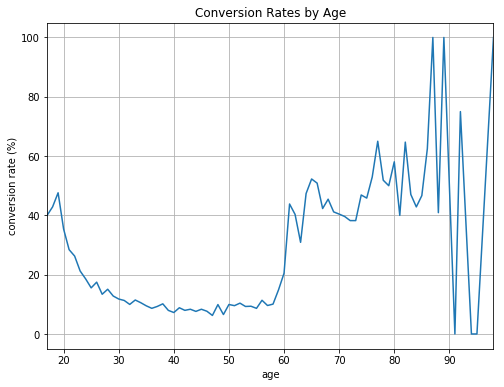

In [7]:
ax = conversions_by_age.plot(grid=True,figsize=(8, 6),title='Conversion Rates by Age')
ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')
plt.show()

In [8]:
df['age_group'] = df['age'].apply(lambda x: '[18, 30)' if x < 30 else '[30, 40)' if x < 40 else '[40, 50)' if x < 50 else '[50, 60)' if x < 60 else '[60, 70)' if x < 70 else '70+')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[30, 40)"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[40, 50)"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"


In [9]:
pd.DataFrame(df.groupby(by='age_group')['conversion'].sum())

,conversion
age_group,
70+,221
"[18, 30)",922
"[30, 40)",1715
"[40, 50)",834
"[50, 60)",697
"[60, 70)",251


In [10]:
pd.DataFrame(df.groupby(by='age_group')['conversion'].count())

,conversion
age_group,
70+,469
"[18, 30)",5669
"[30, 40)",16938
"[40, 50)",10526
"[50, 60)",6862
"[60, 70)",724


In [11]:
conversions_by_age_group = df.groupby(by='age_group')['conversion'].sum() / df.groupby(by='age_group')['conversion'].count() * 100.0
pd.DataFrame(conversions_by_age_group)

,conversion
age_group,
70+,47.121535
"[18, 30)",16.263891
"[30, 40)",10.125162
"[40, 50)",7.923238
"[50, 60)",10.157389
"[60, 70)",34.668508


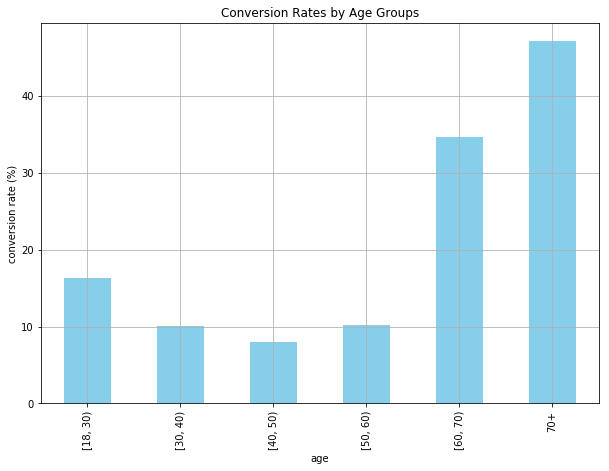

In [12]:
ax = conversions_by_age_group.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(kind='bar',color='skyblue',grid=True,figsize=(10, 7),title='Conversion Rates by Age Groups')

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

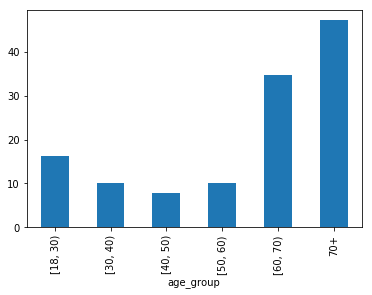

In [13]:
conversions_by_age_group.loc[['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']].plot(kind='bar')

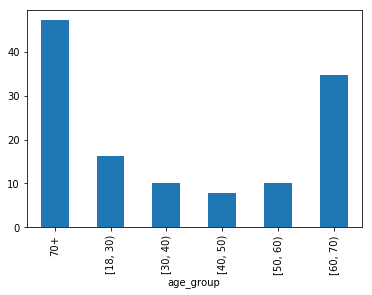

In [14]:
conversions_by_age_group.plot(kind='bar')

### Conversion Rates by Number of Contacts

In [15]:
pd.DataFrame(df.groupby(by='campaign')['conversion'].sum()).head()

,conversion
campaign,
1,2300
2,1211
3,574
4,249
5,120


In [16]:
pd.DataFrame(df.groupby(by='campaign')['conversion'].count()).head()

,conversion
campaign,
1,17642
2,10570
3,5341
4,2651
5,1599


In [17]:
conversions_by_contacts = df.groupby(by='campaign')['conversion'].sum() / df.groupby(by='campaign')['conversion'].count()*100.0
pd.DataFrame(conversions_by_contacts).head(7)

,conversion
campaign,
1,13.037071
2,11.456954
3,10.747051
4,9.392682
5,7.504690
6,7.660878
7,6.041335


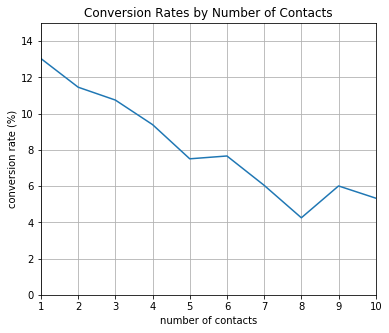

In [18]:
ax = conversions_by_contacts[:10].plot(
grid=True,figsize=(6,5),xticks=conversions_by_contacts.index[:10],title='Conversion Rates by Number of Contacts')
ax.set_ylim([0, 15])
ax.set_xlabel('number of contacts')
ax.set_ylabel('conversion rate (%)')
plt.show()

### Conversions vs. Non-Conversions
#### 1. Marital Status

In [19]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[30, 40)"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[40, 50)"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"


In [20]:
conversions_by_marital_status_df = pd.pivot_table(df, values='y', index='marital', columns='conversion', aggfunc=len)
conversions_by_marital_status_df.columns = ['non_conversions', 'conversions']
conversions_by_marital_status_df

,non_conversions,conversions
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


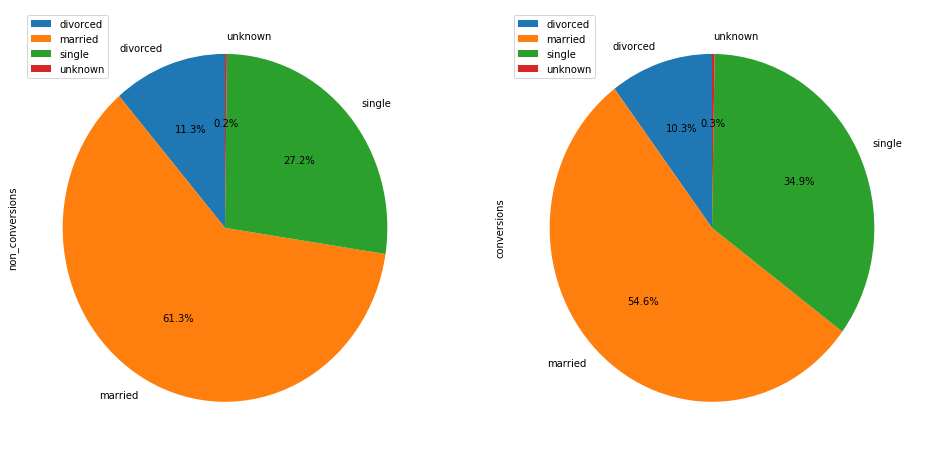

In [21]:
conversions_by_marital_status_df.plot(kind='pie',figsize=(16, 8),startangle=90,subplots=True,
    autopct=lambda x: '%0.1f%%' % x)
plt.show()

#### 2. Education

In [22]:
conversions_by_education_df = pd.pivot_table(df, values='y', index='education', columns='conversion', aggfunc=len)
conversions_by_education_df.columns = ['non_conversions', 'conversions']
conversions_by_education_df

,non_conversions,conversions
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


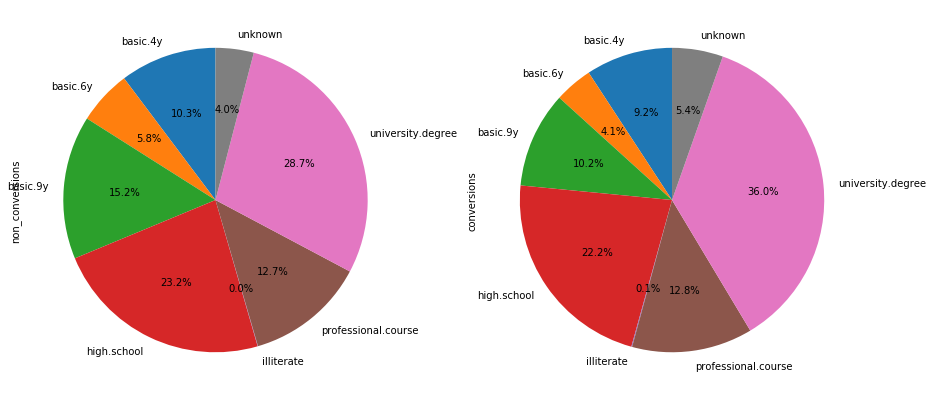

In [23]:
conversions_by_education_df.plot(kind='pie',figsize=(15, 7),startangle=90,subplots=True,
    autopct=lambda x: '%0.1f%%' % x,legend=False)
plt.show()

#### 3. Last Contact Duration

In [24]:
df.groupby('conversion')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
conversion,,,,,,,,
0,36548.0,220.844807,207.096293,0.0,95.0,163.5,279.00,4918.0
1,4640.0,553.191164,401.171871,37.0,253.0,449.0,741.25,4199.0


In [25]:
duration_df = pd.concat([
    df.loc[df['conversion'] == 1, 'duration'].reset_index(drop=True), 
    df.loc[df['conversion'] == 0, 'duration'].reset_index(drop=True)], axis=1)
duration_df.columns = ['conversions', 'non_conversions']
duration_df = duration_df / (60*60)
duration_df

,conversions,non_conversions
0,0.437500,0.072500
1,0.289444,0.041389
2,0.407500,0.062778
3,0.160833,0.041944
4,0.128056,0.085278
5,0.186944,0.055000
6,0.259722,0.038611
7,0.333611,0.060278
8,0.286111,0.105556
9,0.450833,0.013889


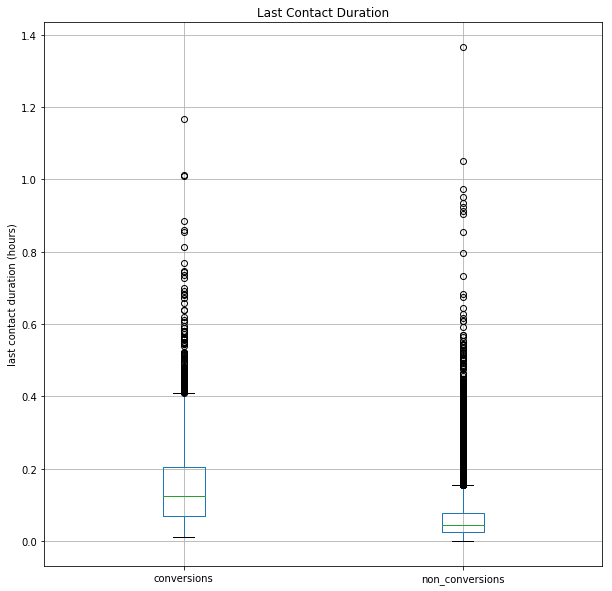

In [26]:
ax = duration_df.plot(kind='box',grid=True,figsize=(10, 10),)
ax.set_ylabel('last contact duration (hours)')
ax.set_title('Last Contact Duration')
plt.show()

### Conversions by Age Groups & Marital Status

In [27]:
age_marital_df = df.groupby(['age_group', 'marital'])['conversion'].sum().unstack('marital').fillna(0)
age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
70+,64.0,151.0,6.0,0.0
"[18, 30)",12.0,158.0,751.0,1.0
"[30, 40)",128.0,897.0,684.0,6.0
"[40, 50)",126.0,575.0,130.0,3.0
"[50, 60)",119.0,533.0,44.0,1.0
"[60, 70)",27.0,218.0,5.0,1.0


In [28]:
age_marital_df = age_marital_df.divide(df.groupby(by='age_group')['conversion'].count(), axis=0)
age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
70+,0.136461,0.321962,0.012793,0.000000
"[18, 30)",0.002117,0.027871,0.132475,0.000176
"[30, 40)",0.007557,0.052958,0.040383,0.000354
"[40, 50)",0.011970,0.054627,0.012350,0.000285
"[50, 60)",0.017342,0.077674,0.006412,0.000146
"[60, 70)",0.037293,0.301105,0.006906,0.001381


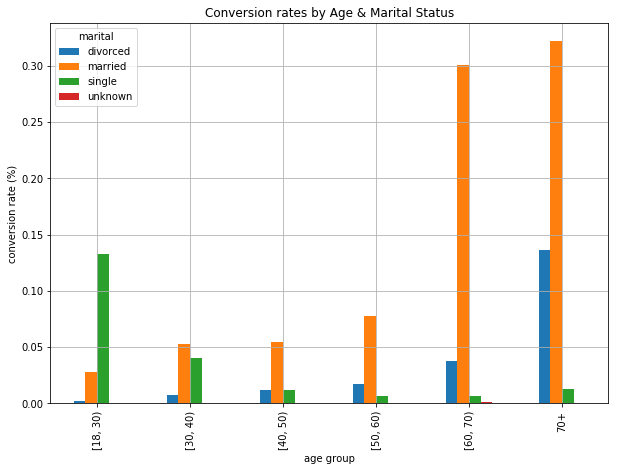

In [29]:
ax = age_marital_df.loc[['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(kind='bar',grid=True,figsize=(10,7))

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')
plt.show()

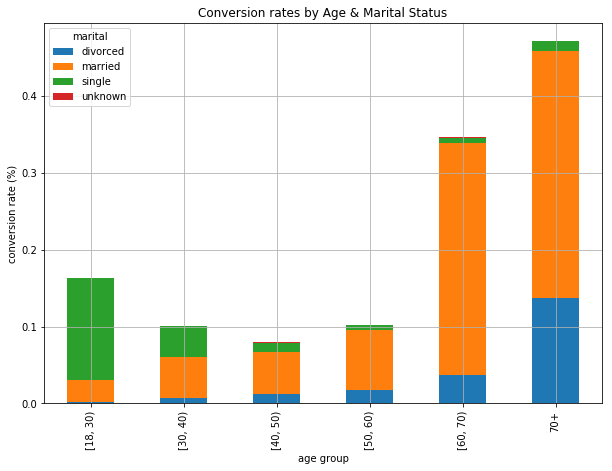

In [30]:
ax = age_marital_df.loc[['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(kind='bar', stacked=True,grid=True,figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')
plt.show()

## Regression Anlaysis

In [31]:
df = pd.read_csv('data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
print(df.shape)
df.head()

(9134, 24)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [32]:
df['Engaged'] = df['Response'].apply(lambda x: 0 if x == 'No' else 1)
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


In [33]:
print(list(df.columns))

['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size', 'Engaged']


In [34]:
engagement_rate_df = pd.DataFrame(df.groupby('Engaged').count()['Response'] / df.shape[0] * 100.0)
engagement_rate_df.T

Engaged,0,1
Response,85.679877,14.320123


### By Renew offer type

In [35]:
engagement_by_offer_type_df = pd.pivot_table(df, values='Response', index='Renew Offer Type', columns='Engaged', aggfunc=len).fillna(0.0)
engagement_by_offer_type_df.columns = ['Not Engaged', 'Engaged']
engagement_by_offer_type_df

,Not Engaged,Engaged
Renew Offer Type,,
Offer1,3158.0,594.0
Offer2,2242.0,684.0
Offer3,1402.0,30.0
Offer4,1024.0,0.0


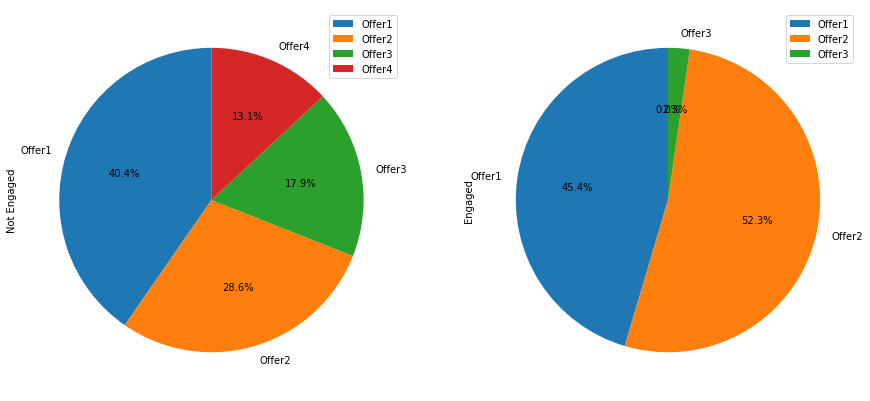

In [36]:
engagement_by_offer_type_df.plot(kind='pie',figsize=(15, 7),startangle=90,subplots=True,
    autopct=lambda x: '%0.1f%%' % x)
plt.show()

## by sales channel

In [37]:
engagement_by_sales_channel_df = df.pivot_table(values='Response', index='Sales Channel', columns='Engaged', aggfunc=len)
engagement_by_sales_channel_df.columns = ['Not Engaged', 'Engaged']
engagement_by_sales_channel_df

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


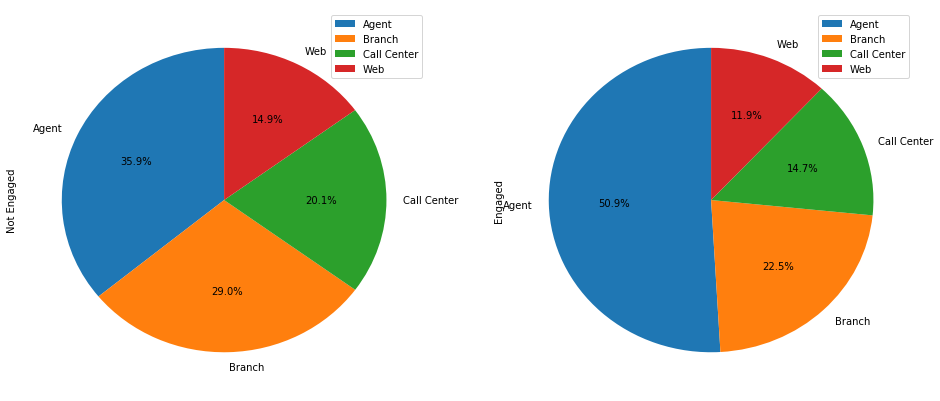

In [38]:
engagement_by_sales_channel_df.plot(kind='pie',figsize=(16, 7),startangle=90,subplots=True,
    autopct=lambda x: '%0.1f%%' % x)

plt.show()

### Total Claim Amount Distributions

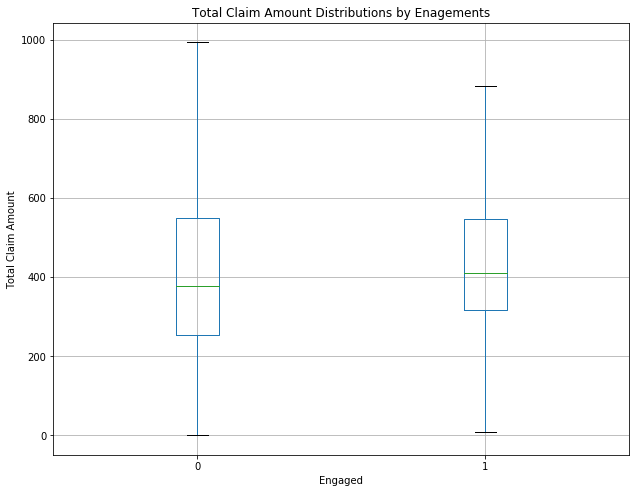

In [39]:
ax = df[['Engaged', 'Total Claim Amount']].boxplot(by='Engaged',showfliers=False,figsize=(10,8))

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Enagements')
plt.suptitle("")
plt.show()

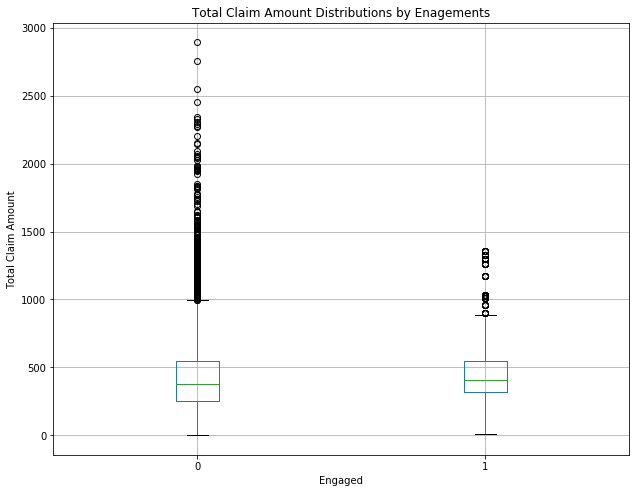

In [40]:
ax = df[['Engaged', 'Total Claim Amount']].boxplot(by='Engaged',showfliers=True,figsize=(10,8))

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Enagements')
plt.suptitle("")
plt.show()

### Income Distributions

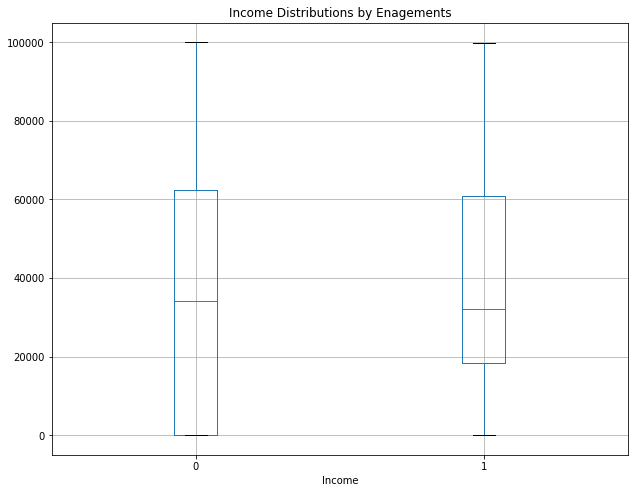

In [41]:
ax = df[['Engaged', 'Income']].boxplot(by='Engaged',showfliers=True,figsize=(10,8))

ax.set_xlabel('Engaged')
ax.set_xlabel('Income')
ax.set_title('Income Distributions by Enagements')
plt.suptitle("")
plt.show()

In [42]:
df.groupby('Engaged').describe()['Income'].T

Engaged,0,1
count,7826.000000,1308.000000
mean,37509.190008,38544.027523
std,30752.259099,28043.637944
min,0.000000,0.000000
25%,0.000000,18495.000000
50%,34091.000000,32234.000000
75%,62454.250000,60880.000000
max,99981.000000,99845.000000


## Regression

In [43]:
import statsmodels.formula.api as sm

In [44]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [45]:
print(df['Income'].dtype)
print(df['Customer Lifetime Value'].dtype)

int64
float64


In [46]:
continuous_vars = [
    'Customer Lifetime Value', 
    'Income', 'Monthly Premium Auto', 
    'Months Since Last Claim', 
    'Months Since Policy Inception', 
    'Number of Open Complaints', 
    'Number of Policies', 
    'Total Claim Amount'
]

In [47]:
logit = sm.Logit(endog=df['Engaged'],exog= df[continuous_vars])
model_logit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


In [48]:
model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Thu, 30 May 2019   Pseudo R-squ.:                -0.02546
Time:                        17:08:07   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
                                        LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

### Handling Categorical Variables

In [49]:
df['Education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [50]:
labels, levels = df['Education'].factorize()
print(labels[1:50])
print(levels)

[0 0 0 0 0 1 2 0 1 1 1 2 3 1 0 3 1 1 3 3 0 0 0 0 1 0 2 1 2 1 3 0 0 0 3 0 2
 0 3 3 1 0 3 1 4 0 3 0 3]
Index(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'], dtype='object')


In [51]:
gender_values, gender_labels = df['Gender'].factorize()
df['GenderFactorized'] = gender_values
print(gender_labels)
print(gender_values)

Index(['F', 'M'], dtype='object')
[0 0 0 ... 1 1 1]


In [52]:
categories = pd.Categorical(df['Education'], categories=['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'])

In [53]:
categories.codes

array([1, 1, 1, ..., 1, 2, 2], dtype=int8)

In [54]:
categories.categories

Index(['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'], dtype='object')

In [55]:
df['EducationFactorized'] = categories.codes
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged,GenderFactorized,EducationFactorized
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0,0,1
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,0,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0,0,1
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0,1,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0,1,1


In [56]:
logit = sm.Logit(endog=df['Engaged'], exog=df[['GenderFactorized','EducationFactorized']])
model_logit_cat = logit.fit()

Optimization terminated successfully.
         Current function value: 0.493068
         Iterations 6


In [57]:
model_logit_cat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 May 2019   Pseudo R-squ.:                 -0.2005
Time:                        17:08:08   Log-Likelihood:                -4503.7
converged:                       True   LL-Null:                       -3751.6
                                        LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
GenderFactorized       -1.1266      0.047    -24.116      0.000      -1.218      -1.035
EducationFactorized    -0.6256      0.021    -29.900      0.000      -0.667      -0.585
=======================================================================================
"""

In [58]:
logit = sm.Logit(
    df['Engaged'], 
    df[['Customer Lifetime Value',
        'Income',
        'Monthly Premium Auto',
        'Months Since Last Claim',
        'Months Since Policy Inception',
        'Number of Open Complaints',
        'Number of Policies',
        'Total Claim Amount',
        'GenderFactorized',
        'EducationFactorized'
    ]]
)

In [59]:
model_logit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.420810
         Iterations 6


In [60]:
model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9124
Method:                           MLE   Df Model:                            9
Date:                Thu, 30 May 2019   Pseudo R-squ.:                -0.02454
Time:                        17:08:08   Log-Likelihood:                -3843.7
converged:                       True   LL-Null:                       -3751.6
                                        LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.909e-06   5.03e-06     -1.373      0.170   -1.68e-05    2.96e-06
Income                         -2.59e-06   1.04e-06     -2.494      0.013   -4.63e-06   -5.55e-07
Monthly Premium Auto             -0.0081      0.001     -6.526      0.000      -0.011      -0.006
Months Since Last Claim          -0.0194      0.003     -6.858      0.000      -0.025      -0.014
Months Since Policy Inception    -0.0057      0.001     -5.827      0.000      -0.008      -0.004
Number of Open Complaints        -0.0813      0.034     -2.376      0.017      -0.148      -0.014
Number of Policies               -0.0781      0.013     -6.114      0.000      -0.103      -0.053
Total Claim Amount                0.0001      0.000      0.943      0.346      -0.000       0.000
GenderFactorized                 -0.1500      0.058     -2.592      0.010      -0.263      -0.037
EducationFactorized              -0.0070      0.027     -0.264      0.792      -0.059       0.045
=================================================================================================
"""

## Engagement to Conversion

In [61]:
df = pd.read_csv('data/bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [62]:
df['conversion'] = df['y'].apply(lambda x: 0 if x == 'no' else 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [63]:
conversion_rate_df = pd.DataFrame(df.groupby('conversion').count()['y'] / df.shape[0] * 100.0)
conversion_rate_df.T

conversion,0,1
y,88.30152,11.69848


### Conversion Rates by Marital Status

In [64]:
conversion_rate_by_marital = df.groupby(by='marital')['conversion'].sum() / df.groupby(by='marital')['conversion'].count() * 100
conversion_rate_by_marital

marital
divorced    11.945458
married     10.123466
single      14.949179
Name: conversion, dtype: float64

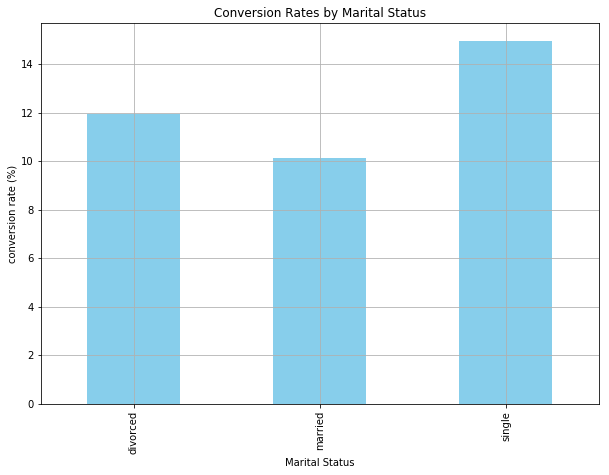

In [65]:
ax = conversion_rate_by_marital.plot(kind='bar',color='skyblue',grid=True,figsize=(10, 7),title='Conversion Rates by Marital Status')

ax.set_xlabel('Marital Status')
ax.set_ylabel('conversion rate (%)')
plt.show()

### Conversion Rates by Job

In [66]:
conversion_rate_by_job = df.groupby(by='job')['conversion'].sum() / df.groupby(by='job')['conversion'].count() * 100.0
conversion_rate_by_job

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: conversion, dtype: float64

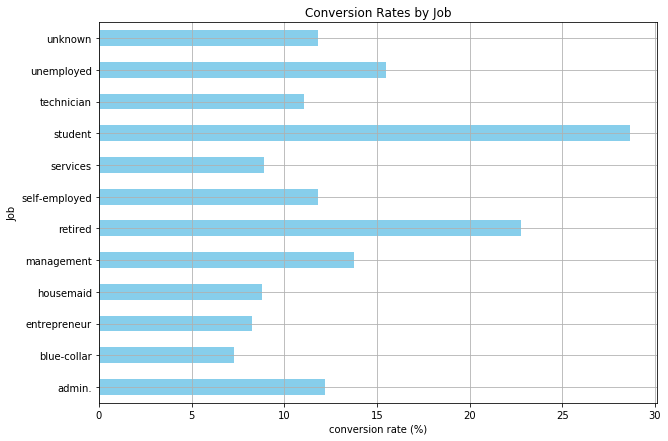

In [67]:
ax = conversion_rate_by_job.plot(kind='barh',color='skyblue',grid=True,figsize=(10, 7),title='Conversion Rates by Job')

ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')
plt.show()

### Default Rates by Conversions

In [68]:
default_by_conversion_df = df.pivot_table(values='y', index='default', columns='conversion', aggfunc=len)
default_by_conversion_df

conversion,0,1
default,,
no,39159,5237
yes,763,52


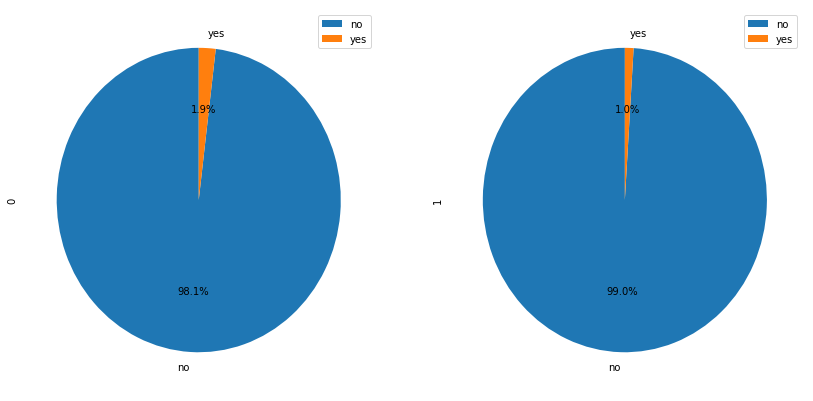

In [69]:
default_by_conversion_df.plot(kind='pie',figsize=(14, 7),startangle=90,subplots=True,
    autopct=lambda x: '%0.1f%%' % x)

plt.show()

### Bank Balance by Conversions

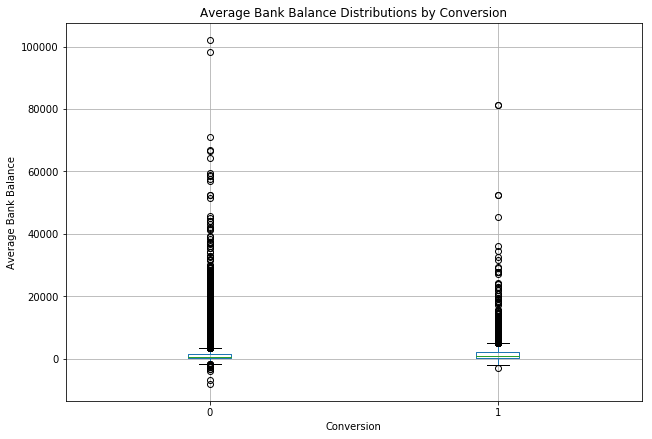

In [70]:
ax = df[['conversion', 'balance']].boxplot(by='conversion',showfliers=True,figsize=(10, 7))

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')
plt.suptitle("")
plt.show()

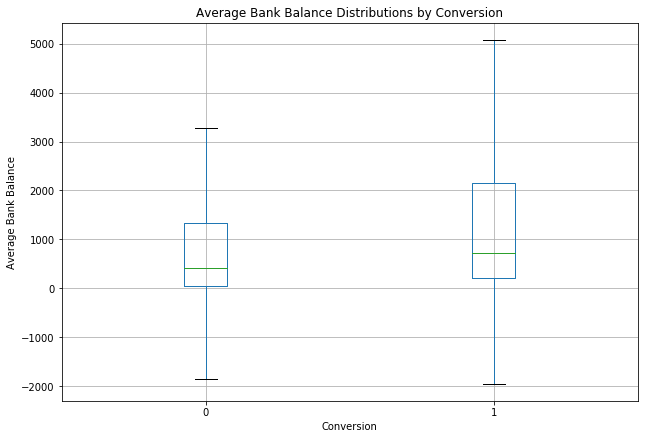

In [71]:
ax = df[['conversion', 'balance']].boxplot(by='conversion',showfliers=False,figsize=(10, 7))

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')
plt.suptitle("")
plt.show()

### Conversions by Number of Contacts

In [72]:
conversions_by_num_contacts = df.groupby(by='campaign')['conversion'].sum() / df.groupby(by='campaign')['conversion'].count()*100
pd.DataFrame(conversions_by_num_contacts).head()

,conversion
campaign,
1,14.597583
2,11.203519
3,11.193624
4,9.000568
5,7.879819


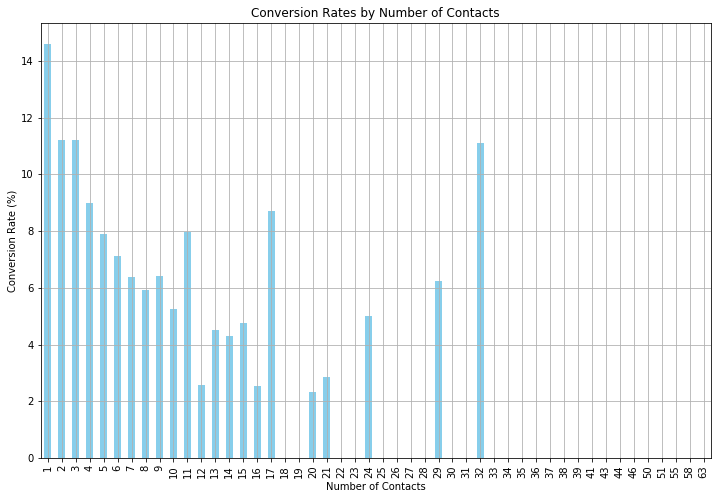

In [73]:
ax = conversions_by_num_contacts.plot(kind='bar',figsize=(12, 8),title='Conversion Rates by Number of Contacts',grid=True,color='skyblue')

ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')
plt.show()

### Handling Categorical Variables

In [74]:
categorical_vars = ['job','marital','education','default','housing','loan','contact','month']

In [75]:
df[categorical_vars].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
dtype: int64

In [76]:
for i in categorical_vars:    
    print(str(i), "------------>",  df[i].unique(), '\n')

job ------------> ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 

marital ------------> ['married' 'single' 'divorced'] 

education ------------> ['tertiary' 'secondary' 'unknown' 'primary'] 

default ------------> ['no' 'yes'] 

housing ------------> ['yes' 'no'] 

loan ------------> ['no' 'yes'] 

contact ------------> ['unknown' 'cellular' 'telephone'] 

month ------------> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 



In [77]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df['month'] = df['month'].apply(lambda x: months.index(x)+1)
df.groupby('month').count()['conversion']

month
1      1403
2      2649
3       477
4      2932
5     13766
6      5341
7      6895
8      6247
9       579
10      738
11     3970
12      214
Name: conversion, dtype: int64

In [78]:
jobs_encoded_df = pd.get_dummies(df['job'])
jobs_encoded_df.columns = ['job_%s' % x for x in jobs_encoded_df.columns]
jobs_encoded_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [79]:
df = pd.concat([df, jobs_encoded_df], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no,0,0,0,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no,0,0,0,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no,0,0,0,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no,0,0,1,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no,0,0,0,0,0,0,0,0,0,0,0,0,1


In [80]:
marital_encoded_df = pd.get_dummies(df['marital'])
marital_encoded_df.columns = ['marital_%s' % x for x in marital_encoded_df.columns]
marital_encoded_df.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [81]:
df = pd.concat([df, marital_encoded_df], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [82]:
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

In [83]:
features = ['age','balance','campaign','previous','housing',] + list(jobs_encoded_df.columns) + list(marital_encoded_df.columns)
response_var = 'conversion'
print(features)

['age', 'balance', 'campaign', 'previous', 'housing', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single']


In [84]:
from sklearn import tree

In [85]:
dt_model = tree.DecisionTreeClassifier(max_depth=4)
dt_model.fit(df[features], df[response_var])
dt_model.classes_

array([0, 1], dtype=int64)

In [86]:
print([w for w in dir(dt_model) if not w.startswith('_')])

['apply', 'class_weight', 'classes_', 'criterion', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'max_depth', 'max_features', 'max_features_', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_classes_', 'n_features_', 'n_outputs_', 'predict', 'predict_log_proba', 'predict_proba', 'presort', 'random_state', 'score', 'set_params', 'splitter', 'tree_']


In [87]:
dt_model.feature_importances_

array([0.22958146, 0.03357839, 0.01104479, 0.30370049, 0.39439427,
       0.        , 0.00785975, 0.        , 0.        , 0.        ,
       0.        , 0.00235943, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0061807 , 0.01130072, 0.        ])

## Product Analytics

In [88]:
df = pd.read_excel('data/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [89]:
df.shape

(541909, 8)

### Distribution of Quantity 

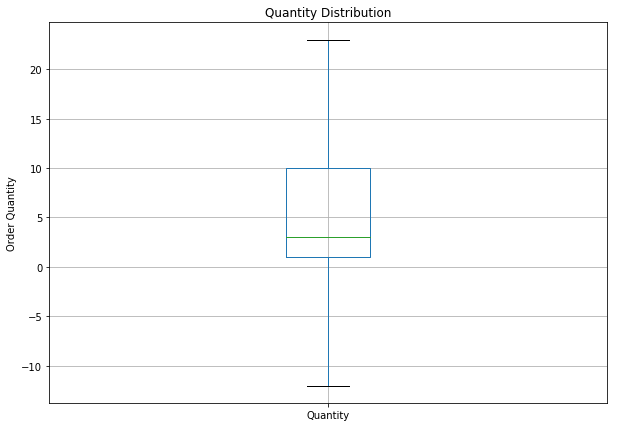

In [90]:
ax = df['Quantity'].plot.box(showfliers=False,grid=True,figsize=(10, 7))

ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')
plt.suptitle("")
plt.show()

In [91]:
pd.DataFrame(df['Quantity'].describe())

,Quantity
count,541909.000000
mean,9.552250
std,218.081158
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [92]:
print(df.loc[df['Quantity'] > 0].shape)
print(df.shape)

(531285, 8)
(541909, 8)


In [93]:
df = df.loc[df['Quantity'] > 0]

#### Time-series Number of Orders

In [94]:
#monthly_orders_df = df.set_index('InvoiceDate').resample('M').nunique()
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
monthly_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: M, Name: InvoiceNo, dtype: int64

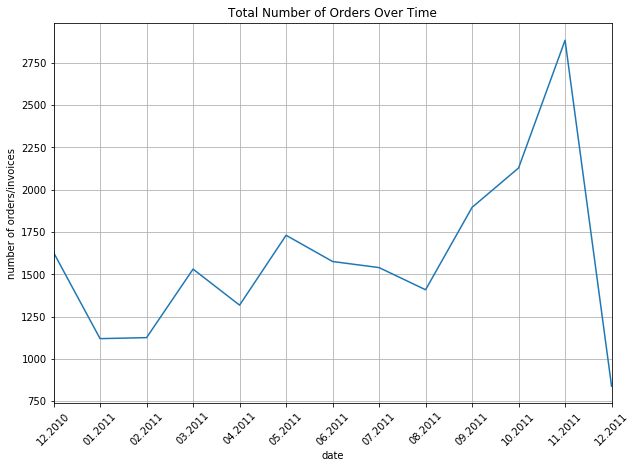

In [95]:
ax = pd.DataFrame(monthly_orders_df.values).plot(grid=True,figsize=(10,7),legend=False)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(range(len(monthly_orders_df.index)), [x.strftime('%m.%Y') for x in monthly_orders_df.index], rotation=45)
plt.show()

In [96]:
invoice_dates = df.loc[df['InvoiceDate'] >= '2011-12-01','InvoiceDate']
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


In [97]:
print(df.loc[df['InvoiceDate'] < '2011-12-01'].shape)
print(df.shape)

(506150, 8)
(531285, 8)


In [98]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [99]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
monthly_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
Freq: M, Name: InvoiceNo, dtype: int64

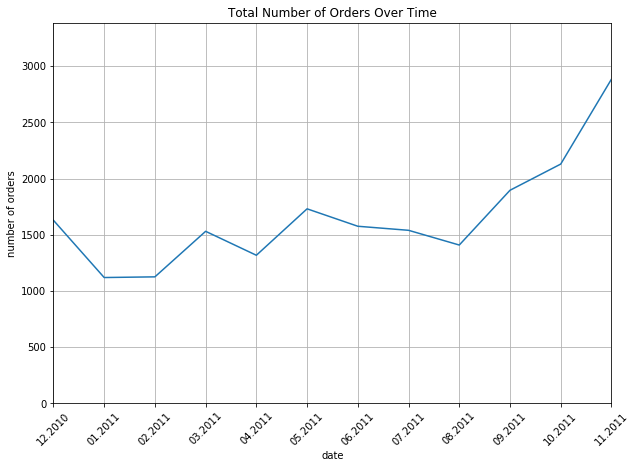

In [100]:
ax = pd.DataFrame(monthly_orders_df.values).plot(grid=True,figsize=(10,7),legend=False)

ax.set_xlabel('date')
ax.set_ylabel('number of orders')
ax.set_title('Total Number of Orders Over Time')
ax.set_ylim([0, max(monthly_orders_df.values)+500])

plt.xticks(range(len(monthly_orders_df.index)), [x.strftime('%m.%Y') for x in monthly_orders_df.index], rotation=45)
plt.show()

#### Time-series Revenue

In [101]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df[['Sales','Quantity','UnitPrice']].head(5)

,Sales,Quantity,UnitPrice
0,15.30,6,2.55
1,20.34,6,3.39
2,22.00,8,2.75
3,20.34,6,3.39
4,20.34,6,3.39


In [102]:
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()
monthly_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Sales, dtype: float64

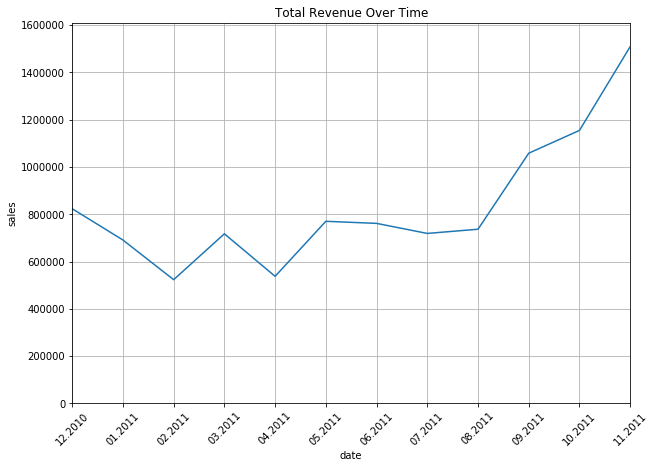

In [103]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(grid=True,figsize=(10,7),legend=False)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')
ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

plt.xticks(range(len(monthly_revenue_df.index)), [x.strftime('%m.%Y') for x in monthly_revenue_df.index], rotation=45)
plt.show()

### Repeat Customers

In [104]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [105]:
df.groupby(by=['InvoiceNo', 'InvoiceDate']).agg({'Sales':sum, 'CustomerID':max, 'Country':max}).reset_index()

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom
5,536370,2010-12-01 08:45:00,855.86,12583.0,France
6,536371,2010-12-01 09:00:00,204.00,13748.0,United Kingdom
7,536372,2010-12-01 09:01:00,22.20,17850.0,United Kingdom
8,536373,2010-12-01 09:02:00,259.86,17850.0,United Kingdom
9,536374,2010-12-01 09:09:00,350.40,15100.0,United Kingdom


In [106]:
invoice_customer_df = df.groupby(by=['InvoiceNo', 'InvoiceDate']).agg({'Sales': sum,'CustomerID': max,'Country': max,}).reset_index()
invoice_customer_df.head(4)

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom


In [107]:
invoice_customer_df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'CustomerID']).count().head(10)

InvoiceNo  Sales  Country
InvoiceDate CustomerID                           
2010-12-31  12347.0             1      1        1
            12348.0             1      1        1
            12370.0             2      2        2
            12377.0             1      1        1
            12383.0             1      1        1
            12386.0             1      1        1
            12395.0             2      2        2
            12417.0             1      1        1
            12423.0             1      1        1
            12427.0             1      1        1

In [108]:
invoice_customer_df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).head(10)

,InvoiceNo,Sales,CustomerID,Country
InvoiceDate,,,,
2010-12-01 08:26:00,536365,139.12,17850.0,United Kingdom
2010-12-01 08:28:00,536366,22.20,17850.0,United Kingdom
2010-12-01 08:34:00,536367,278.73,13047.0,United Kingdom
2010-12-01 08:34:00,536368,70.05,13047.0,United Kingdom
2010-12-01 08:35:00,536369,17.85,13047.0,United Kingdom
2010-12-01 09:01:00,536372,22.20,17850.0,United Kingdom
2010-12-01 09:02:00,536373,259.86,17850.0,United Kingdom
2010-12-01 09:09:00,536374,350.40,15100.0,United Kingdom
2010-12-01 09:32:00,536375,259.86,17850.0,United Kingdom


In [109]:
invoice_customer_df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'CustomerID']
                                                    ).filter(lambda x: len(x) > 1).resample('M').nunique()

,InvoiceNo,Sales,CustomerID,Country
InvoiceDate,,,,
2010-12-31,778,720,263,12
2011-01-31,399,394,153,7
2011-02-28,393,387,153,10
2011-03-31,550,542,203,11
2011-04-30,463,460,170,6
2011-05-31,780,755,281,10
2011-06-30,622,611,220,9
2011-07-31,609,593,227,11
2011-08-31,544,526,198,11


In [110]:
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'CustomerID'
    ]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']
pd.DataFrame(monthly_repeat_customers_df)

,CustomerID
InvoiceDate,
2010-12-31,263
2011-01-31,153
2011-02-28,153
2011-03-31,203
2011-04-30,170
2011-05-31,281
2011-06-30,220
2011-07-31,227
2011-08-31,198


In [111]:
monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
pd.DataFrame(monthly_unique_customers_df)

,CustomerID
InvoiceDate,
2010-12-31,885
2011-01-31,741
2011-02-28,758
2011-03-31,974
2011-04-30,856
2011-05-31,1056
2011-06-30,991
2011-07-31,949
2011-08-31,935


In [112]:
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
pd.DataFrame(monthly_repeat_percentage)

,CustomerID
InvoiceDate,
2010-12-31,29.717514
2011-01-31,20.647773
2011-02-28,20.184697
2011-03-31,20.841889
2011-04-30,19.859813
2011-05-31,26.609848
2011-06-30,22.199798
2011-07-31,23.919916
2011-08-31,21.176471


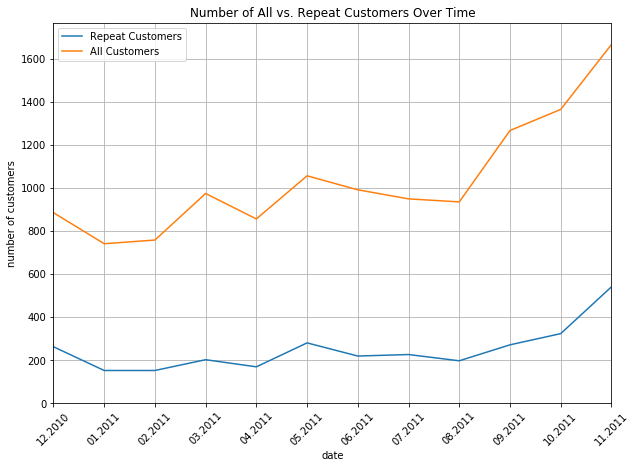

In [113]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(figsize=(10,7))
pd.DataFrame(monthly_unique_customers_df.values).plot(ax=ax,grid=True)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')
ax.legend(['Repeat Customers', 'All Customers'])
ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
plt.xticks(range(len(monthly_repeat_customers_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index], rotation=45)
plt.show()

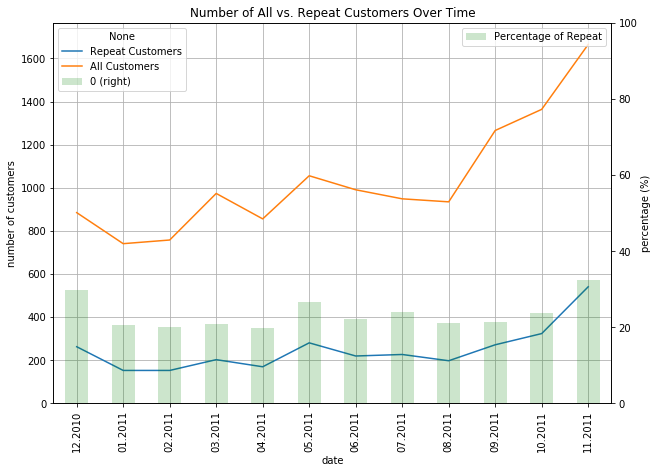

In [114]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(figsize=(10,7))
pd.DataFrame(monthly_unique_customers_df.values).plot(ax=ax,grid=True)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')
ax.legend(['Repeat Customers', 'All Customers'])
ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(ax=ax,grid=True,secondary_y=True,color='green',alpha=0.2)
ax2.set_ylabel('percentage (%)')
ax2.legend(['Percentage of Repeat'], loc='upper right')
ax2.set_ylim([0, 100])

plt.xticks(range(len(monthly_repeat_customers_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index], rotation=45)
plt.show()

### Revenue from Repeat Customers

In [115]:
monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'CustomerID'
                    ]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']

In [116]:
monthly_rev_repeat_customers_df

InvoiceDate
2010-12-31    359170.60
2011-01-31    222124.00
2011-02-28    191229.37
2011-03-31    267390.48
2011-04-30    195474.18
2011-05-31    378197.04
2011-06-30    376307.26
2011-07-31    317475.00
2011-08-31    317134.25
2011-09-30    500663.36
2011-10-31    574006.87
2011-11-30    713775.85
Freq: M, Name: Sales, dtype: float64

In [117]:
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0
monthly_rev_perc_repeat_customers_df

InvoiceDate
2010-12-31    43.602098
2011-01-31    32.128346
2011-02-28    36.519810
2011-03-31    37.259729
2011-04-30    36.346420
2011-05-31    49.082331
2011-06-30    49.401017
2011-07-31    44.141497
2011-08-31    43.029595
2011-09-30    47.295296
2011-10-31    49.698455
2011-11-30    47.285696
Freq: M, Name: Sales, dtype: float64

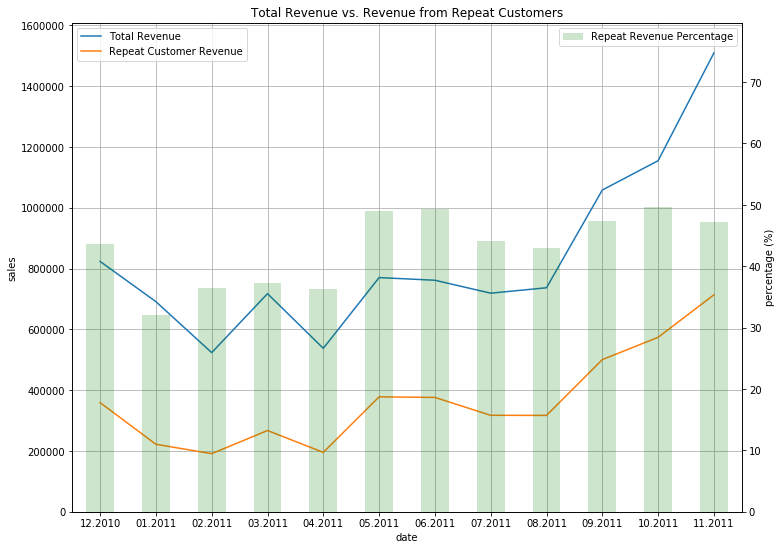

In [118]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,9))
pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(ax=ax,grid=True,)
ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')
ax.legend(['Total Revenue', 'Repeat Customer Revenue'])
ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()
pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(ax=ax2,kind='bar',color='g',alpha=0.2)
ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])
ax2.set_xticklabels([x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index])

plt.show()

###  Popular Items Over Time

In [119]:
date_item_df = pd.DataFrame(df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum())
date_item_df.head()

Quantity
InvoiceDate StockCode          
2010-12-31  10002           251
            10120            16
            10125           154
            10133           130
            10135           411

In [120]:
# Rank items by the last month sales
last_month_sorted_df = date_item_df.loc['2011-11-30'].sort_values( by='Quantity', ascending=False).reset_index()
last_month_sorted_df.head(5)

,InvoiceDate,StockCode,Quantity
0,2011-11-30,23084,14954
1,2011-11-30,84826,12551
2,2011-11-30,22197,12460
3,2011-11-30,22086,7908
4,2011-11-30,85099B,5909


In [121]:
# Regroup for top 5 items
date_item_df = pd.DataFrame(
    df.loc[df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
    ].set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum())
date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  22086          2460
            22197          2738
            84826           366
            85099B         2152
2011-01-31  22086            24
            22197          1824
            84826           480
            85099B         2747
2011-02-28  22086             5
            22197          2666
            84826            66
            85099B         3080
2011-03-31  22086            87
            22197          2803
            84826            60
            85099B         5282
2011-04-30  22086            13
            22197          1869
            84826             1
            85099B         2456
2011-05-31  22086            17
            22197          6849
            23084          1131
            85099B         3621
2011-06-30  22086           344
            22197          2095
            23084          1713
            84826             4
            85099B         3682
2011-07-31  22086           383
            22197          1876
            23084           318
            84826             2
            85099B         3129
2011-08-31  22086           490
            22197          5421
            23084          2267
            84826            72
            85099B         5502
2011-09-30  22086          2106
            22197          4196
            23084           680
            85099B         4401
2011-10-31  22086          3429
            22197          5907
            23084          6348
            84826            11
            85099B         5412
2011-11-30  22086          7908
            22197         12460
            23084         14954
            84826         12551
            85099B         5909

In [122]:
df.loc[df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])].set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode']).sum()

Quantity  UnitPrice  CustomerID     Sales
InvoiceDate StockCode                                           
2010-12-31  22086          2460     584.41   2189533.0   9225.80
            22197          2738     136.50   1247115.0   2630.79
            84826           366       5.30    150002.0    119.10
            85099B         2152     312.06   1282620.0   4019.15
2011-01-31  22086            24      59.72         0.0    143.32
            22197          1824      85.05    680940.0   1495.48
            84826           480       1.47     97627.0    100.80
            85099B         2747     313.05   1211937.0   5047.65
2011-02-28  22086             5      15.37     13421.0     24.95
            22197          2666      88.39    687417.0   2127.00
            84826            66       1.06     29801.0     17.70
            85099B         3080     308.87   1347492.0   5617.24
2011-03-31  22086            87      17.63     57714.0    232.01
            22197          2803      97.76   1019324.0   3032.81
            84826            60       0.85     15819.0     51.00
            85099B         5282     441.96   1822372.0  10118.38
2011-04-30  22086            13      23.38     60400.0     44.03
            22197          1869      71.35    932325.0   1495.57
            84826             1       0.85     15581.0      0.85
            85099B         2456     309.56   1317164.0   4878.08
2011-05-31  22086            17      15.37     14288.0     65.19
            22197          6849     111.62   1207591.0   5151.63
            23084          1131     213.03   1085444.0   2279.57
            85099B         3621     481.57   2055052.0   7122.73
2011-06-30  22086           344      36.24     67414.0    910.88
            22197          2095     104.38   1199921.0   1706.91
            23084          1713     239.73   1191726.0   3326.87
            84826             4       1.70     14583.0      3.40
            85099B         3682     485.45   1961698.0   7247.98
2011-07-31  22086           383     115.49    350042.0   1077.93
            22197          1876      99.93   1074421.0   1540.00
            23084           318     133.84    171248.0    668.59
            84826             2       0.85     17966.0      1.70
            85099B         3129     478.64   2012755.0   6253.87
2011-08-31  22086           490     117.35    395768.0   1334.94
            22197          5421      78.34   1017134.0   4133.35
            23084          2267     115.52    380945.0   3533.57
            84826            72       1.70     29704.0     61.20
            85099B         5502     411.97   2405414.0  10796.56
2011-09-30  22086          2106     565.32   2272846.0   6006.10
            22197          4196     133.71   1465911.0   3607.13
            23084           680     136.09     88101.0    699.78
            85099B         4401     522.67   2861201.0   8884.33
2011-10-31  22086          3429     779.43   3161943.0  10031.39
            22197          5907     155.78   1863740.0   4813.95
            23084          6348     177.90    892016.0  12256.87
            84826            11       3.40     67169.0      9.35
            85099B         5412     454.84   2558683.0  10485.81
2011-11-30  22086          7908    1309.74   5537731.0  28985.04
            22197         12460     254.52   3271778.0  14195.60
            23084         14954    1144.78   6943009.0  34556.72
            84826         12551       3.40     81306.0      9.35
            85099B         5909     592.60   3272555.0  11641.37

In [123]:
trending_itmes_df = date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('InvoiceDate')
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)
trending_itmes_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2460.0,2738.0,0.0,366.0,2152.0
2011-01-31,24.0,1824.0,0.0,480.0,2747.0
2011-02-28,5.0,2666.0,0.0,66.0,3080.0
2011-03-31,87.0,2803.0,0.0,60.0,5282.0
2011-04-30,13.0,1869.0,0.0,1.0,2456.0
2011-05-31,17.0,6849.0,1131.0,0.0,3621.0
2011-06-30,344.0,2095.0,1713.0,4.0,3682.0
2011-07-31,383.0,1876.0,318.0,2.0,3129.0
2011-08-31,490.0,5421.0,2267.0,72.0,5502.0


In [124]:
trending_itmes_df = date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)
trending_itmes_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2460.0,2738.0,0.0,366.0,2152.0
2011-01-31,24.0,1824.0,0.0,480.0,2747.0
2011-02-28,5.0,2666.0,0.0,66.0,3080.0
2011-03-31,87.0,2803.0,0.0,60.0,5282.0
2011-04-30,13.0,1869.0,0.0,1.0,2456.0
2011-05-31,17.0,6849.0,1131.0,0.0,3621.0
2011-06-30,344.0,2095.0,1713.0,4.0,3682.0
2011-07-31,383.0,1876.0,318.0,2.0,3129.0
2011-08-31,490.0,5421.0,2267.0,72.0,5502.0


In [125]:
date_item_df.reset_index().pivot('InvoiceDate', 'StockCode').fillna(0)

Quantity                                   
StockCode      22086    22197    23084    84826  85099B
InvoiceDate                                            
2010-12-31    2460.0   2738.0      0.0    366.0  2152.0
2011-01-31      24.0   1824.0      0.0    480.0  2747.0
2011-02-28       5.0   2666.0      0.0     66.0  3080.0
2011-03-31      87.0   2803.0      0.0     60.0  5282.0
2011-04-30      13.0   1869.0      0.0      1.0  2456.0
2011-05-31      17.0   6849.0   1131.0      0.0  3621.0
2011-06-30     344.0   2095.0   1713.0      4.0  3682.0
2011-07-31     383.0   1876.0    318.0      2.0  3129.0
2011-08-31     490.0   5421.0   2267.0     72.0  5502.0
2011-09-30    2106.0   4196.0    680.0      0.0  4401.0
2011-10-31    3429.0   5907.0   6348.0     11.0  5412.0
2011-11-30    7908.0  12460.0  14954.0  12551.0  5909.0

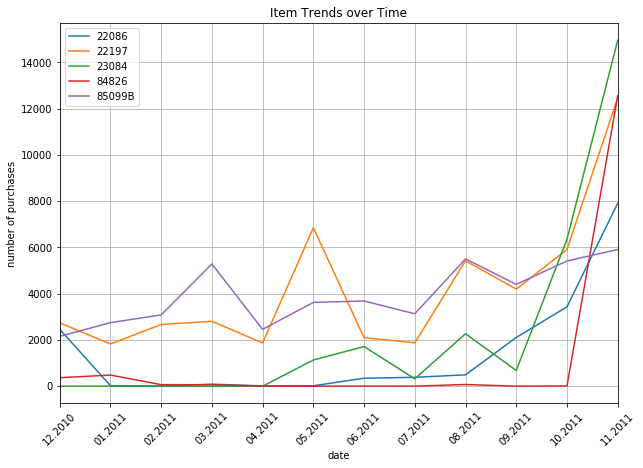

In [126]:
ax = pd.DataFrame(trending_itmes_df.values).plot(figsize=(10,7),grid=True,)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')
ax.legend(trending_itmes_df.columns, loc='upper left')

plt.xticks(range(len(trending_itmes_df.index)), [x.strftime('%m.%Y') for x in trending_itmes_df.index], rotation=45)
plt.show()

## Product Recommendation

In [127]:
df = pd.read_excel('data/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [128]:
print(df.shape)
df = df.loc[df['Quantity'] > 0]
print(df.shape)

(541909, 8)
(531285, 8)


In [129]:
print(df['CustomerID'].isna().sum() /541909 * 100)
print(df['CustomerID'].isna().sum())

24.60948240387224
133361


In [130]:
df.loc[df['CustomerID'].isna()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [131]:
print(df.shape)
df = df.dropna(subset=['CustomerID'])
print(df.shape)

(531285, 8)
(397924, 8)


In [132]:
customer_item_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum')
customer_item_matrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,15039,16008,16010,16011,16012,16014,16015,16016,16033,16043,16045,16046,16048,16049,16052,16054,16216,16218,16219,16225,16235,16236,16237,16238,16254,16259,17001,17003,17021,17038,17096,17174,18007,20615,20616,20617,20618,20619,20622,20652,20653,20654,20655,20657,20658,20659,20661,20662,20663,20664,20665,20666,20667,20668,20669,20670,20671,20674,20675,20676,20677,20678,20679,20681,20682,20684,20685,20686,20694,20695,20696,20697,20698,20699,20700,20701,20702,20703,20704,20705,20707,20711,20712,20713,20716,20717,20718,20719,20723,20724,20725,20726,20727,20728,20731,20733,20735,20748,20749,20750,20751,20752,20754,20755,20756,20757,20758,20759,20760,20761,20762,20763,20764,20765,20766,20767,20768,20769,20770,20771,20772,20773,20774,20775,20777,20778,20780,20781,20782,20785,20793,20794,20795,20796,20798,20801,20802,20803,20816,20818,20819,20820,20821,20823,20826,20827,20828,20829,20830,20831,20832,20835,20836,20837,20838,20839,20840,20845,20846,20847,20848,20851,20854,20856,20857,20861,20866,20867,20868,20869,20878,20886,20892,20893,20894,20897,20898,20901,20902,20903,20906,20910,20914,20931,20932,20933,20934,20935,20936,20941,20956,20961,20963,20964,20966,20967,20969,20970,20971,20972,20973,20974,20975,20977,20978,20979,20980,20981,20982,20983,20984,20985,20986,20992,20996,20997,20998,21000,21001,21002,21003,21011,21012,21014,21015,21018,21025,21026,21027,21028,21030,21031,21032,21033,21034,21035,21038,21039,21040,21041,...,85232B,85232D,90000A,90000B,90000D,90001A,90001B,90001C,90001D,90002D,90003B,90003C,90003D,90003E,90010A,90010B,90010E,90011A,90011B,90012A,90012B,90013A,90013C,90014A,90014B,90014C,90016A,90016B,90018A,90018B,90018C,90019A,90019B,90019C,90024B,90024C,90024D,90024F,90025A,90025F,90026A,90026B,90026C,90026D,90027A,90027D,90030A,90030B,90030C,90035A,90035C,90036A,90036B,90036C,90036D,90036E,90036F,90037B,90038A,90038B,90038C,90039A,90039B,90039C,90039D,90040A,90040B,90040C,90042A,90058A,90058B,90059A,90059B,90059C,90059D,90059E,90059F,90060B,90060D,90063A,90063B,90064A,90064B,90065A,90065B,90067A,90081A,90081C,90082A,90082B,90082D,90120B,90120C,90120D,90122A,90122B,90122C,90123A,90123B,90123C,90123D,90124A,90124B,90124C,90125A,90125B,90125C,90125D,90125E,90128B,90129A,90129B,90129C,90129D,90129E,90129F,90130A,90130B,90141A,90141B,90141C,90141D,90141E,90142D,90152A,90152B,90152C,90160A,90160B,90160C,90160D,90161A,90161B,90161C,90161D,90162A,90162B,90162C,90162D,90163A,90163B,90164A,90164B,90165B,90175A,90175C,90175D,90176A,90176B,90176C,90176D,90176E,90177A,90177B,90177C,90177D,90177E,90178A,90178B,90179A,90179C,90180A,90180B,90181A,90182C,90183A,90183C,90184A,90184B,90184C,90185A,90185B,90185C,90185D,90186A,90186B,90187B,90189A,90190A,90190B,90190C,90195A,90195B,90196A,90196B,90197B,90198A,90198B,90199A,90199B,90199C,90199D,90200A,90200B,90200C,90200D,90200E,90201A,90201B,90201C,90201D,90202A,90202B,90202C,90202D,90205A,90205C,90206A,90206C,90209A,90209B,90209C,90210A,90210B,90210C,90210D,90211A,90211B,90212B,90212C,90214A,90214B,90214C,90214D,90214E,90214F,90214G,90214H,90214I,90214J,90214K,90214L,90214M,90214N,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [133]:
print(customer_item_matrix.shape)

(4339, 3665)


In [134]:
print('There are {} unique Stock Codes'.format(df['StockCode'].nunique()))
print('There are {} unique Customer IDs'.format(df['CustomerID'].nunique()))

There are 3665 unique Stock Codes
There are 4339 unique Customer IDs


In [135]:
customer_item_matrix.loc[12348.0].sum()

2341.0

### Binarization

In [136]:
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)
customer_item_matrix.loc[12481:].head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,15039,16008,16010,16011,16012,16014,16015,16016,16033,16043,16045,16046,16048,16049,16052,16054,16216,16218,16219,16225,16235,16236,16237,16238,16254,16259,17001,17003,17021,17038,17096,17174,18007,20615,20616,20617,20618,20619,20622,20652,20653,20654,20655,20657,20658,20659,20661,20662,20663,20664,20665,20666,20667,20668,20669,20670,20671,20674,20675,20676,20677,20678,20679,20681,20682,20684,20685,20686,20694,20695,20696,20697,20698,20699,20700,20701,20702,20703,20704,20705,20707,20711,20712,20713,20716,20717,20718,20719,20723,20724,20725,20726,20727,20728,20731,20733,20735,20748,20749,20750,20751,20752,20754,20755,20756,20757,20758,20759,20760,20761,20762,20763,20764,20765,20766,20767,20768,20769,20770,20771,20772,20773,20774,20775,20777,20778,20780,20781,20782,20785,20793,20794,20795,20796,20798,20801,20802,20803,20816,20818,20819,20820,20821,20823,20826,20827,20828,20829,20830,20831,20832,20835,20836,20837,20838,20839,20840,20845,20846,20847,20848,20851,20854,20856,20857,20861,20866,20867,20868,20869,20878,20886,20892,20893,20894,20897,20898,20901,20902,20903,20906,20910,20914,20931,20932,20933,20934,20935,20936,20941,20956,20961,20963,20964,20966,20967,20969,20970,20971,20972,20973,20974,20975,20977,20978,20979,20980,20981,20982,20983,20984,20985,20986,20992,20996,20997,20998,21000,21001,21002,21003,21011,21012,21014,21015,21018,21025,21026,21027,21028,21030,21031,21032,21033,21034,21035,21038,21039,21040,21041,...,85232B,85232D,90000A,90000B,90000D,90001A,90001B,90001C,90001D,90002D,90003B,90003C,90003D,90003E,90010A,90010B,90010E,90011A,90011B,90012A,90012B,90013A,90013C,90014A,90014B,90014C,90016A,90016B,90018A,90018B,90018C,90019A,90019B,90019C,90024B,90024C,90024D,90024F,90025A,90025F,90026A,90026B,90026C,90026D,90027A,90027D,90030A,90030B,90030C,90035A,90035C,90036A,90036B,90036C,90036D,90036E,90036F,90037B,90038A,90038B,90038C,90039A,90039B,90039C,90039D,90040A,90040B,90040C,90042A,90058A,90058B,90059A,90059B,90059C,90059D,90059E,90059F,90060B,90060D,90063A,90063B,90064A,90064B,90065A,90065B,90067A,90081A,90081C,90082A,90082B,90082D,90120B,90120C,90120D,90122A,90122B,90122C,90123A,90123B,90123C,90123D,90124A,90124B,90124C,90125A,90125B,90125C,90125D,90125E,90128B,90129A,90129B,90129C,90129D,90129E,90129F,90130A,90130B,90141A,90141B,90141C,90141D,90141E,90142D,90152A,90152B,90152C,90160A,90160B,90160C,90160D,90161A,90161B,90161C,90161D,90162A,90162B,90162C,90162D,90163A,90163B,90164A,90164B,90165B,90175A,90175C,90175D,90176A,90176B,90176C,90176D,90176E,90177A,90177B,90177C,90177D,90177E,90178A,90178B,90179A,90179C,90180A,90180B,90181A,90182C,90183A,90183C,90184A,90184B,90184C,90185A,90185B,90185C,90185D,90186A,90186B,90187B,90189A,90190A,90190B,90190C,90195A,90195B,90196A,90196B,90197B,90198A,90198B,90199A,90199B,90199C,90199D,90200A,90200B,90200C,90200D,90200E,90201A,90201B,90201C,90201D,90202A,90202B,90202C,90202D,90205A,90205C,90206A,90206C,90209A,90209B,90209C,90210A,90210B,90210C,90210D,90211A,90211B,90212B,90212C,90214A,90214B,90214C,90214D,90214E,90214F,90214G,90214H,90214I,90214J,90214K,90214L,90214M,90214N,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12481.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Collaborative Filtering

In [137]:
from sklearn.metrics.pairwise import cosine_similarity

### User-Based Collaborative Filtering
#### User2User Similarity Matrix

In [138]:
user_user_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix))
user_user_sim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,4089,4090,4091,4092,4093,4094,4095,4096,4097,4098,4099,4100,4101,4102,4103,4104,4105,4106,4107,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118,4119,4120,4121,4122,4123,4124,4125,4126,4127,4128,4129,4130,4131,4132,4133,4134,4135,4136,4137,4138,4139,4140,4141,4142,4143,4144,4145,4146,4147,4148,4149,4150,4151,4152,4153,4154,4155,4156,4157,4158,4159,4160,4161,4162,4163,4164,4165,4166,4167,4168,4169,4170,4171,4172,4173,4174,4175,4176,4177,4178,4179,4180,4181,4182,4183,4184,4185,4186,4187,4188,4189,4190,4191,4192,4193,4194,4195,4196,4197,4198,4199,4200,4201,4202,4203,4204,4205,4206,4207,4208,4209,4210,4211,4212,4213,4214,4215,4216,4217,4218,4219,4220,4221,4222,4223,4224,4225,4226,4227,4228,4229,4230,4231,4232,4233,4234,4235,4236,4237,4238,4239,4240,4241,4242,4243,4244,4245,4246,4247,4248,4249,4250,4251,4252,4253,4254,4255,4256,4257,4258,4259,4260,4261,4262,4263,4264,4265,4266,4267,4268,4269,4270,4271,4272,4273,4274,4275,4276,4277,4278,4279,4280,4281,4282,4283,4284,4285,4286,4287,4288,4289,4290,4291,4292,4293,4294,4295,4296,4297,4298,4299,4300,4301,4302,4303,4304,4305,4306,4307,4308,4309,4310,4311,4312,4313,4314,4315,4316,4317,4318,4319,4320,4321,4322,4323,4324,4325,4326,4327,4328,4329,4330,4331,4332,4333,4334,4335,4336,4337,4338
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.104828,0.000000,0.000000,0.000000,0.000000,0.047458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [139]:
user_user_sim_matrix.columns = customer_item_matrix.index
user_user_sim_matrix['CustomerID'] = customer_item_matrix.index
user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')
user_user_sim_matrix.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,12357.0,12358.0,12359.0,12360.0,12361.0,12362.0,12363.0,12364.0,12365.0,12367.0,12370.0,12371.0,12372.0,12373.0,12374.0,12375.0,12377.0,12378.0,12379.0,12380.0,12381.0,12383.0,12384.0,12386.0,12388.0,12390.0,12391.0,12393.0,12394.0,12395.0,12397.0,12398.0,12399.0,12401.0,12402.0,12403.0,12405.0,12406.0,12407.0,12408.0,12409.0,12410.0,12412.0,12413.0,12414.0,12415.0,12417.0,12418.0,12420.0,12421.0,12422.0,12423.0,12424.0,12425.0,12426.0,12427.0,12428.0,12429.0,12430.0,12431.0,12432.0,12433.0,12434.0,12435.0,12436.0,12437.0,12438.0,12441.0,12442.0,12444.0,12445.0,12446.0,12447.0,12448.0,12449.0,12450.0,12451.0,12452.0,12453.0,12454.0,12455.0,12456.0,12457.0,12458.0,12461.0,12462.0,12463.0,12464.0,12465.0,12468.0,12471.0,12472.0,12473.0,12474.0,12475.0,12476.0,12477.0,12478.0,12479.0,12480.0,12481.0,12483.0,12484.0,12488.0,12489.0,12490.0,12491.0,12492.0,12493.0,12494.0,12497.0,12498.0,12500.0,12501.0,12502.0,12504.0,12506.0,12507.0,12508.0,12509.0,12510.0,12512.0,12513.0,12514.0,12515.0,12516.0,12517.0,12518.0,12519.0,12520.0,12521.0,12522.0,12523.0,12524.0,12526.0,12527.0,12528.0,12530.0,12531.0,12532.0,12534.0,12535.0,12536.0,12538.0,12539.0,12540.0,12541.0,12544.0,12545.0,12546.0,12547.0,12548.0,12550.0,12551.0,12552.0,12553.0,12556.0,12557.0,12558.0,12559.0,12560.0,12561.0,12562.0,12564.0,12565.0,12566.0,12567.0,12569.0,12571.0,12572.0,12573.0,12574.0,12576.0,12577.0,12578.0,12579.0,12580.0,12581.0,12582.0,12583.0,12584.0,12585.0,12586.0,12587.0,12588.0,12589.0,12590.0,12591.0,12592.0,12593.0,12594.0,12596.0,12597.0,12598.0,12599.0,12600.0,12601.0,12602.0,12603.0,12604.0,12607.0,12609.0,12610.0,12611.0,12612.0,12613.0,12614.0,12615.0,12616.0,12617.0,12618.0,12619.0,12620.0,12621.0,12622.0,12623.0,12624.0,12625.0,12626.0,12627.0,12628.0,12630.0,12631.0,12633.0,12635.0,12637.0,12638.0,12639.0,12640.0,12641.0,12642.0,12643.0,12644.0,12645.0,12646.0,12647.0,12648.0,12649.0,12650.0,12651.0,...,17941.0,17942.0,17946.0,17947.0,17948.0,17949.0,17950.0,17951.0,17954.0,17955.0,17956.0,17957.0,17958.0,17960.0,17961.0,17962.0,17964.0,17965.0,17966.0,17967.0,17968.0,17969.0,17970.0,17972.0,17973.0,17974.0,17975.0,17976.0,17977.0,17978.0,17979.0,17980.0,17984.0,17985.0,17986.0,17987.0,17988.0,17990.0,17991.0,17994.0,17995.0,17997.0,17999.0,18001.0,18004.0,18005.0,18006.0,18008.0,18009.0,18010.0,18011.0,18013.0,18014.0,18015.0,18016.0,18017.0,18018.0,18019.0,18022.0,18024.0,18027.0,18030.0,18032.0,18033.0,18034.0,18035.0,18036.0,18037.0,18040.0,18041.0,18042.0,18043.0,18044.0,18045.0,18048.0,18050.0,18053.0,18055.0,18056.0,18058.0,18059.0,18061.0,18062.0,18064.0,18065.0,18066.0,18067.0,18068.0,18069.0,18071.0,18072.0,18073.0,18074.0,18075.0,18077.0,18078.0,18079.0,18080.0,18081.0,18082.0,18084.0,18085.0,18086.0,18087.0,18088.0,18092.0,18093.0,18094.0,18095.0,18096.0,18097.0,18099.0,18101.0,18102.0,18104.0,18105.0,18106.0,18108.0,18109.0,18110.0,18112.0,18113.0,18114.0,18116.0,18117.0,18118.0,18119.0,18120.0,18121.0,18122.0,18123.0,18125.0,18126.0,18127.0,18129.0,18130.0,18133.0,18135.0,18136.0,18138.0,18139.0,18142.0,18143.0,18144.0,18145.0,18146.0,18147.0,18149.0,18150.0,18151.0,18154.0,18155.0,18156.0,18158.0,18159.0,18160.0,18161.0,18164.0,18165.0,18167.0,18168.0,18169.0,18170.0,18171.0,18172.0,18173.0,18174.0,18176.0,18177.0,18178.0,18179.0,18180.0,18181.0,18183.0,18184.0,18185.0,18188.0,18189.0,18190.0,18191.0,18192.0,18193.0,18194.0,18196.0,18198.0,18200.0,18202.0,18203.0,18204.0,18205.0,18209.0,18210.0,18211.0,18212.0,18213.0,18215.0,18216.0,18217.0,18218.0,18219.0,18220.0,18221.0,18222.0,18223.0,18224.0,18225.0,18226.0,18227.0,18228.0,18229.0,18230.0,18231.0,18232.0,18233.0,18235.0,18236.0,18237.0,18239.0,18240.0,18241.0,18242.0,18245.0,18246.0,18248.0,18249.0,18250.0,18251.0,18252.0,18255.0,18257.0,18259.0,18260.0,18261.0,18262.0,18263.0,18265.0,18268.0,18269.0,18270.0,18272.0,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,1

In [140]:
user_user_sim_matrix.shape

(4339, 4339)

In [141]:
user_user_sim_matrix.loc[12350.0].sort_values(ascending=False)

CustomerID
12350.0    1.000000
17935.0    0.183340
12414.0    0.181902
12652.0    0.175035
16692.0    0.171499
16754.0    0.171499
12814.0    0.171499
12791.0    0.171499
16426.0    0.166968
16333.0    0.161690
12475.0    0.161690
12735.0    0.157378
12449.0    0.156290
12684.0    0.155268
17486.0    0.148522
16846.0    0.146254
12394.0    0.142695
12603.0    0.140028
12665.0    0.140028
17788.0    0.140028
15435.0    0.135113
12797.0    0.134535
14624.0    0.134535
12613.0    0.130682
12497.0    0.129641
12645.0    0.127386
12628.0    0.124784
16247.0    0.121268
12817.0    0.121268
12789.0    0.121268
12445.0    0.121268
12736.0    0.121268
15160.0    0.121268
12587.0    0.121268
12731.0    0.116153
17272.0    0.115954
17191.0    0.113981
16411.0    0.113633
17673.0    0.111636
13621.0    0.111283
17806.0    0.110959
15722.0    0.108465
12403.0    0.108465
13223.0    0.108465
12548.0    0.108465
12401.0    0.108465
17889.0    0.108465
12659.0    0.108465
13817.0    0.108465
15707.0  

In [142]:
customer_item_matrix.loc[12350.0].nonzero()

(array([  43,   49,  324,  749,  762,  764,  801,  807, 1153, 1207, 1337,
        1342, 1403, 3047, 3060, 3092, 3664], dtype=int64),)

In [143]:
items_bought_by_A = set(customer_item_matrix.loc[12350.0].iloc[customer_item_matrix.loc[12350.0].nonzero()].index)
print(items_bought_by_A)

{20615, 21832, 21864, 21866, 20652, 22348, 22412, '79066K', '84086C', '79191C', 21171, 21908, 22551, 'POST', 21915, 22620, 22557}


In [144]:
items_bought_by_B = set(customer_item_matrix.loc[17935.0].iloc[customer_item_matrix.loc[17935.0].nonzero()].index)
print(items_bought_by_B)

{22659, 23309, 22551, 22553, 'POST', 22557, '85099B', 20657, 22449, 20659, 22450, 21051, 22208, 22209, 22210, 22211, 20828, 22749, 22752, 22753, 22754, 22755, 21866, 21867, 22640, 20856, 23290, 23292}


In [145]:
items_to_recommend_to_B = items_bought_by_A - items_bought_by_B
items_to_recommend_to_B

{20615,
 20652,
 21171,
 21832,
 21864,
 21908,
 21915,
 22348,
 22412,
 22620,
 '79066K',
 '79191C',
 '84086C'}

In [146]:
df.loc[df['StockCode'].isin(items_to_recommend_to_B), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode')

,Description
StockCode,
21832,CHOCOLATE CALCULATOR
21915,RED HARMONICA IN BOX
22620,4 TRADITIONAL SPINNING TOPS
79066K,RETRO MOD TRAY
21864,UNION JACK FLAG PASSPORT COVER
79191C,RETRO PLASTIC ELEPHANT TRAY
21908,CHOCOLATE THIS WAY METAL SIGN
20615,BLUE POLKADOT PASSPORT COVER
20652,BLUE POLKADOT LUGGAGE TAG


In [147]:
item_item_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix.T))
item_item_sim_matrix.columns = customer_item_matrix.T.index
item_item_sim_matrix['StockCode'] = customer_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('StockCode')
item_item_sim_matrix.head(10)

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,15039,16008,16010,16011,16012,16014,16015,16016,16033,16043,16045,16046,16048,16049,16052,16054,16216,16218,16219,16225,16235,16236,16237,16238,16254,16259,17001,17003,17021,17038,17096,17174,18007,20615,20616,20617,20618,20619,20622,20652,20653,20654,20655,20657,20658,20659,20661,20662,20663,20664,20665,20666,20667,20668,20669,20670,20671,20674,20675,20676,20677,20678,20679,20681,20682,20684,20685,20686,20694,20695,20696,20697,20698,20699,20700,20701,20702,20703,20704,20705,20707,20711,20712,20713,20716,20717,20718,20719,20723,20724,20725,20726,20727,20728,20731,20733,20735,20748,20749,20750,20751,20752,20754,20755,20756,20757,20758,20759,20760,20761,20762,20763,20764,20765,20766,20767,20768,20769,20770,20771,20772,20773,20774,20775,20777,20778,20780,20781,20782,20785,20793,20794,20795,20796,20798,20801,20802,20803,20816,20818,20819,20820,20821,20823,20826,20827,20828,20829,20830,20831,20832,20835,20836,20837,20838,20839,20840,20845,20846,20847,20848,20851,20854,20856,20857,20861,20866,20867,20868,20869,20878,20886,20892,20893,20894,20897,20898,20901,20902,20903,20906,20910,20914,20931,20932,20933,20934,20935,20936,20941,20956,20961,20963,20964,20966,20967,20969,20970,20971,20972,20973,20974,20975,20977,20978,20979,20980,20981,20982,20983,20984,20985,20986,20992,20996,20997,20998,21000,21001,21002,21003,21011,21012,21014,21015,21018,21025,21026,21027,21028,21030,21031,21032,21033,21034,21035,21038,21039,21040,21041,...,85232B,85232D,90000A,90000B,90000D,90001A,90001B,90001C,90001D,90002D,90003B,90003C,90003D,90003E,90010A,90010B,90010E,90011A,90011B,90012A,90012B,90013A,90013C,90014A,90014B,90014C,90016A,90016B,90018A,90018B,90018C,90019A,90019B,90019C,90024B,90024C,90024D,90024F,90025A,90025F,90026A,90026B,90026C,90026D,90027A,90027D,90030A,90030B,90030C,90035A,90035C,90036A,90036B,90036C,90036D,90036E,90036F,90037B,90038A,90038B,90038C,90039A,90039B,90039C,90039D,90040A,90040B,90040C,90042A,90058A,90058B,90059A,90059B,90059C,90059D,90059E,90059F,90060B,90060D,90063A,90063B,90064A,90064B,90065A,90065B,90067A,90081A,90081C,90082A,90082B,90082D,90120B,90120C,90120D,90122A,90122B,90122C,90123A,90123B,90123C,90123D,90124A,90124B,90124C,90125A,90125B,90125C,90125D,90125E,90128B,90129A,90129B,90129C,90129D,90129E,90129F,90130A,90130B,90141A,90141B,90141C,90141D,90141E,90142D,90152A,90152B,90152C,90160A,90160B,90160C,90160D,90161A,90161B,90161C,90161D,90162A,90162B,90162C,90162D,90163A,90163B,90164A,90164B,90165B,90175A,90175C,90175D,90176A,90176B,90176C,90176D,90176E,90177A,90177B,90177C,90177D,90177E,90178A,90178B,90179A,90179C,90180A,90180B,90181A,90182C,90183A,90183C,90184A,90184B,90184C,90185A,90185B,90185C,90185D,90186A,90186B,90187B,90189A,90190A,90190B,90190C,90195A,90195B,90196A,90196B,90197B,90198A,90198B,90199A,90199B,90199C,90199D,90200A,90200B,90200C,90200D,90200E,90201A,90201B,90201C,90201D,90202A,90202B,90202C,90202D,90205A,90205C,90206A,90206C,90209A,90209B,90209C,90210A,90210B,90210C,90210D,90211A,90211B,90212B,90212C,90214A,90214B,90214C,90214D,90214E,90214F,90214G,90214H,90214I,90214J,90214K,90214L,90214M,90214N,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.000000,0.094868,0.090351,0.062932,0.098907,0.095346,0.047673,0.075593,0.090815,0.062284,0.043033,0.182574,0.076948,0.027524,0.054233,0.036274,0.049386,0.000000,0.000000,0.040489,0.043853,0.024693,0.000000,0.070711,0.05

In [148]:
top_10_similar_items = list(item_item_sim_matrix.loc[23166].sort_values(ascending=False).iloc[:10].index)
top_10_similar_items

[23166, 23165, 23167, 22993, 23307, 22722, 22720, 22666, 23243, 22961]

In [149]:
df.loc[df['StockCode'].isin(top_10_similar_items), ['StockCode', 'Description']]
.drop_duplicates().set_index('StockCode').loc[top_10_similar_items]

SyntaxError: invalid syntax (<ipython-input-149-181baad33ddb>, line 2)

In [ ]:
df.loc[df['StockCode'].isin(top_10_similar_items),['StockCode', 'Description']].drop_duplicates().set_index('StockCode').loc[top_10_similar_items]

In [ ]:
df[df['StockCode']==23166]['Description'].drop_duplicates()

## Customer Behavior

In [ ]:
df = pd.read_csv('data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
print(df.shape)
df.head()

In [ ]:
df.groupby(by='Response').count()['Customer']

In [ ]:
ax = df.groupby('Response').count()['Customer'].plot(
    kind='bar',color='skyblue',grid=True,figsize=(10, 7),title='Marketing Engagment')

ax.set_xlabel('Engaged')
ax.set_ylabel('Count')
plt.show()

In [ ]:
df.groupby('Response').count()['Customer']/df.shape[0]

### Offer Type wise Engagement Rate

In [ ]:
by_offer_type_df = df.loc[df['Response'] == 'Yes'].groupby(['Renew Offer Type']).count()['Customer'] /df.groupby('Renew Offer Type').count()['Customer']
by_offer_type_df

In [ ]:
ax = (by_offer_type_df*100.0).plot(kind='bar',figsize=(7, 7),color='skyblue',grid=True)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

### Offer Type wise Vehicle size wise Engagement Rate

In [ ]:
by_offer_type_df = df.loc[df['Response'] == 'Yes'].groupby(['Renew Offer Type', 'Vehicle Class'
    ]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']
by_offer_type_df

In [ ]:
by_offer_type_df = by_offer_type_df.unstack().fillna(0)
by_offer_type_df

In [ ]:
ax = (by_offer_type_df*100.0).plot(kind='bar',figsize=(10, 7),grid=True)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

### Sales Channel wise Engagement Rates

In [ ]:
by_sales_channel_df = df.loc[df['Response'] == 'Yes'].groupby(['Sales Channel'
    ]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

by_sales_channel_df

In [ ]:
ax = (by_sales_channel_df*100.0).plot(kind='bar',figsize=(7, 7),color='skyblue',grid=True)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

### Sales Channel wise Vehicle Size Engagement Rates

In [ ]:
by_sales_channel_df = df.loc[df['Response'] == 'Yes'].groupby(['Sales Channel', 'Vehicle Size'
    ]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

by_sales_channel_df

In [ ]:
by_sales_channel_df = by_sales_channel_df.unstack()
by_sales_channel_df

In [ ]:
ax = (by_sales_channel_df*100.0).plot(kind='bar',figsize=(10, 7),grid=True)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

#### Engagement Rat by Months since policy inception

In [ ]:
by_months_since_inception_df = df.loc[df['Response'] == 'Yes'].groupby(by='Months Since Policy Inception'
)['Response'].count() / df.groupby(by='Months Since Policy Inception')['Response'].count() * 100.0

by_months_since_inception_df.fillna(0).head()

In [ ]:
ax = by_months_since_inception_df.fillna(0).plot(figsize=(10, 7),title='Engagement Rates by Months Since Inception',grid=True,color='skyblue')
ax.set_xlabel('Months Since Policy Inception')
ax.set_ylabel('Engagement Rate (%)')
plt.show()

## Customer Segmentation by CLV & months since policy inception

In [ ]:
df[['Customer Lifetime Value','Months Since Policy Inception']].describe()

In [ ]:
df['CLV Segment'] = df['Customer Lifetime Value'].apply(lambda x:'High' if x>df['Customer Lifetime Value'].median() else 'Low')
print(df['CLV Segment'].value_counts())

In [ ]:
df['Policy Age Segment'] = df['Months Since Policy Inception'].apply(lambda x: 'High' if x > df['Months Since Policy Inception'].median() else 'Low')
print(df['Policy Age Segment'].value_counts())

In [ ]:
df[['CLV Segment','Policy Age Segment']].head(10)

In [ ]:
ax = df.loc[(df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'High')
           ].plot.scatter(x='Months Since Policy Inception',y='Customer Lifetime Value',logy=True,color='red')

df.loc[(df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'High')
      ].plot.scatter(ax=ax,x='Months Since Policy Inception',y='Customer Lifetime Value',logy=True,color='blue')

df.loc[(df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'Low')
      ].plot.scatter(ax=ax,x='Months Since Policy Inception',y='Customer Lifetime Value',logy=True,color='orange')

df.loc[(df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'Low')
      ].plot.scatter(ax=ax,x='Months Since Policy Inception',y='Customer Lifetime Value',logy=True,color='green',grid=True,figsize=(10, 7))

ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')
ax.set_title('Segments by CLV and Policy Age')
plt.show()

In [ ]:
engagment_rates_by_segment_df = df.loc[df['Response'] == 'Yes'].groupby(['CLV Segment', 'Policy Age Segment']
).count()['Customer']/df.groupby(['CLV Segment', 'Policy Age Segment']).count()['Customer']

engagment_rates_by_segment_df

In [ ]:
ax = (engagment_rates_by_segment_df.unstack()*100.0).plot(kind='bar',figsize=(10, 7),grid=True)
ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rates by Customer Segments')
plt.show()

## Predicting Engagement

In [ ]:
df.head()

### Feature Engineering

In [ ]:
df['Engaged'] = df['Response'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Engaged'].mean()

In [ ]:
df.describe()

In [ ]:
continuous_features = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
    'Months Since Last Claim', 'Months Since Policy Inception',
    'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']
columns_to_encode = [
    'Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type', 
    'EmploymentStatus', 'Marital Status', 'Education', 'Coverage'
]

In [ ]:
for i in columns_to_encode:
    print("\n----------",i,"-------\n\n",df[i].value_counts())

In [ ]:
categorical_features = []
for col in columns_to_encode:
    encoded_df = pd.get_dummies(df[col])
    encoded_df.columns = [col.replace(' ', '.') + '.' + x for x in encoded_df.columns]
    
    categorical_features += list(encoded_df.columns)
    
    df = pd.concat([df, encoded_df], axis=1)

In [ ]:
df['Is.Female'] = df['Gender'].apply(lambda x: 1 if x == 'F' else 0)
categorical_features.append('Is.Female')

In [ ]:
all_features = continuous_features + categorical_features
response = 'Engaged'

In [ ]:
sample_df = df[all_features + [response]]
sample_df.columns = [x.replace(' ', '.') for x in sample_df.columns]
all_features = [x.replace(' ', '.') for x in all_features]

In [ ]:
sample_df.head(7)

### Model Building

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(sample_df[all_features], sample_df[response], test_size=0.3)

In [ ]:
print('Whole Dataset',sample_df.shape)
print('Train Dataset',x_train.shape)
print('Test Dataset ',x_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, max_depth=5)
rf_model.fit(x_train, y_train)

In [ ]:
rf_model.estimators_[0:5]

In [ ]:
rf_model.feature_importances_

In [ ]:
rf_model.feature_importances_.argsort()[-5:]

In [ ]:
for i in [ 1,  7, 93, 94, 92]:
    print(rf_model.feature_importances_[i])

In [ ]:
rf_model.feature_importances_

In [ ]:
feature_importance_df = pd.DataFrame(list(zip(rf_model.feature_importances_, all_features)))
feature_importance_df.columns = ['feature.importance', 'feature']
feature_importance_df.sort_values(by='feature.importance', ascending=False)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

in_sample_preds = rf_model.predict(x_train)
out_sample_preds = rf_model.predict(x_test)

print('In-Sample Accuracy:      %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy:  %0.4f' % accuracy_score(y_test, out_sample_preds))
print()
print('In-Sample Precision:     %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))
print()
print('In-Sample Recall:        %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall:    %0.4f' % recall_score(y_test, out_sample_preds))

In [ ]:
from sklearn.metrics import roc_curve, auc

in_sample_preds = rf_model.predict_proba(x_train)[:,1]
out_sample_preds = rf_model.predict_proba(x_test)[:,1]

in_sample_fpr, in_sample_tpr, in_sample_thresholds    = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In [ ]:
plt.figure(figsize=(10,7))

plt.plot(out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc)

plt.plot(in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Model ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Customer Lifetime Value

In [ ]:
df = pd.read_excel('data/Online Retail.xlsx', sheet_name='Online Retail')
print(df.shape)
df.head()

In [ ]:
print(df.loc[df['Quantity'] <= 0].shape)
print(df.shape)
df = df.loc[df['Quantity'] > 0]
print(df.shape)

In [ ]:
print(pd.isnull(df['CustomerID']).sum() / df.shape[0] * 100)

In [ ]:
df = df[pd.notnull(df['CustomerID'])]
print(df.shape)
df.head()

In [ ]:
print('Date Range: %s ~ %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

In [ ]:
df.loc[df['InvoiceDate'] >= '2011-12-01'].shape[0] / df.shape[0] * 100

In [ ]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']
print(df.shape)

In [ ]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

In [ ]:
orders_df = df.groupby(['CustomerID','InvoiceNo']).agg({'Sales':sum,'InvoiceDate':max})
orders_df

In [ ]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [ ]:
type(orders_df['InvoiceDate'][0])

In [ ]:
summary_df = orders_df.reset_index().groupby('CustomerID').agg({
    'Sales':[min,max,sum,groupby_mean, groupby_count],
    'InvoiceDate':[min,max,purchase_duration, avg_frequency]
})
summary_df

In [ ]:
summary_df.columns

In [ ]:
for col in summary_df.columns:
    print(col)

In [ ]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]
summary_df.head()

In [ ]:
print(summary_df.shape)
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]
print(summary_df.shape)

In [ ]:
ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(kind='bar', color='skyblue',figsize=(12,7), grid=True)
ax.set_ylabel('count')
plt.show()

In [ ]:
summary_df[['sales_count','sales_avg']].describe()

In [ ]:
ax = summary_df['invoicedate_purchase_frequency'].hist(bins=20,color='skyblue',rwidth=0.7,figsize=(12,7))
ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')
plt.show()

In [ ]:
summary_df[['invoicedate_purchase_frequency','invoicedate_purchase_duration']].describe()

In [ ]:
clv_freq = '3M'

In [ ]:
orders_df.reset_index().groupby(['CustomerID',pd.Grouper(key='InvoiceDate', freq=clv_freq)
]).agg({'Sales': [sum, groupby_mean, groupby_count],})

In [ ]:
data_df = orders_df.reset_index().groupby(['CustomerID',pd.Grouper(key='InvoiceDate', freq=clv_freq)
]).agg({'Sales': [sum, groupby_mean, groupby_count],})

data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()
data_df.head(10)

In [ ]:
sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True)

In [ ]:
{str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True))}

In [ ]:
date_month_map = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
        sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True))}

data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])
data_df.head(10)

In [ ]:
data_df.loc[data_df['M'] != 'M_1'].pivot_table(columns='M', index='CustomerID', values=['sales_sum', 'sales_avg', 'sales_count'])

In [ ]:
features_df = pd.pivot_table(
    data_df.loc[data_df['M'] != 'M_1'], values=['sales_sum', 'sales_avg', 'sales_count'], columns='M', index='CustomerID')

features_df.columns = ['_'.join(col) for col in features_df.columns]
print(features_df.shape)
features_df = features_df.fillna(0)
features_df.head(10)

In [ ]:
response_df = data_df.loc[data_df['M'] == 'M_1',['CustomerID', 'sales_sum']]
response_df.columns = ['CustomerID', 'CLV_'+clv_freq]
print(response_df.shape)
response_df.head(10)

In [ ]:
sample_set_df = features_df.merge(response_df, left_index=True, right_on='CustomerID',how='left')
print(sample_set_df.shape)
sample_set_df = sample_set_df.fillna(0)
sample_set_df.head(10)

In [ ]:
sample_set_df['CLV_'+clv_freq].describe()

### Model Building

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
target_var = 'CLV_'+clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID', target_var]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(sample_set_df[all_features], sample_set_df[target_var], test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)
reg_fit.intercept_

In [ ]:
coef_df = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef_df.columns = ['feature', 'coef']
coef_df.sort_values(by='coef', axis=0, ascending=False, inplace=True)
coef_df

In [ ]:
from sklearn.metrics import r2_score, median_absolute_error

In [ ]:
train_preds =  reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

print('In-Sample R-Squared:     %0.4f' % r2_score(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true=y_test, y_pred=test_preds))

print('In-Sample MSE:           %0.4f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample MSE:       %0.4f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

In [ ]:
plt.scatter(y_train, train_preds)
plt.plot([0, max(y_train)], [0, max(train_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('In-Sample Actual vs. Predicted')
plt.grid()
plt.show()

In [ ]:
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()
plt.show()

## Customer Segmentation

In [ ]:
df = pd.read_excel('data/Online Retail.xlsx', sheet_name='Online Retail')
print(df.shape)
df.head()

In [ ]:
print(df.loc[df['Quantity'] <= 0].shape)
print(df.shape)
df = df.loc[df['Quantity'] > 0]
print(df.shape)

In [ ]:
pd.isnull(df['CustomerID']).sum()
print(df.shape)
df = df[pd.notnull(df['CustomerID'])]
print(df.shape)

In [ ]:
df.head()

In [ ]:
print('Date Range: %s ~ %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))
print(df.loc[df['InvoiceDate'] >= '2011-12-01'].shape)
print(df.shape)
df = df.loc[df['InvoiceDate'] < '2011-12-01']
print(df.shape)

In [ ]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

In [ ]:
customer_df = df.groupby('CustomerID').agg({'Sales': sum,'InvoiceNo': lambda x: x.nunique()})
customer_df.columns = ['TotalSales', 'OrderCount']
customer_df['AvgOrderValue'] = customer_df['TotalSales']/customer_df['OrderCount']
customer_df.head()

In [ ]:
customer_df.describe()

In [ ]:
rank_df = customer_df.rank(method='first')
rank_df.describe()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])
print(kmeans.labels_)
print(kmeans.cluster_centers_)

In [ ]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_
four_cluster_df.head(10)

In [ ]:
four_cluster_df.groupby('Cluster').count()['TotalSales']

In [ ]:
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],c='blue')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],c='red')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],c='orange')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],c='green')

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],c='blue')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],c='red')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],c='orange')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],c='green')

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')
plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],c='blue')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],c='red')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],c='orange')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],c='green')

plt.title('AvgOrderValue vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')
plt.grid()
plt.show()

### Visualize cluster shapes in 3d

In [ ]:
import plotly
import plotly.graph_objs as go

In [ ]:
cluster1=four_cluster_df.loc[four_cluster_df['Cluster'] == 0]
cluster2=four_cluster_df.loc[four_cluster_df['Cluster'] == 1]
cluster3=four_cluster_df.loc[four_cluster_df['Cluster'] == 2]
cluster4=four_cluster_df.loc[four_cluster_df['Cluster'] == 3]

scatter1 = dict(
    mode = "markers",
    name = "Cluster 1",
    type = "scatter3d",    
    x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2],
    marker = dict( size=2, color='green')
)
scatter2 = dict(
    mode = "markers",
    name = "Cluster 2",
    type = "scatter3d",    
    x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2],
    marker = dict( size=2, color='blue')
)
scatter3 = dict(
    mode = "markers",
    name = "Cluster 3",
    type = "scatter3d",    
    x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2],
    marker = dict( size=2, color='red')
)
# scatter4 = dict(
#     mode = "markers",
#     name = "Cluster 4",
#     type = "scatter3d",    
#     x = cluster4.as_matrix()[:,0], y = cluster4.as_matrix()[:,1], z = cluster4.as_matrix()[:,2],
#     marker = dict( size=2, color='yellow')
# )

cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
    type = "mesh3d",    
    x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2],
    color='green', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
    type = "mesh3d",    
    x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2],
    color='blue', showscale = True
)
cluster3 = dict(
    alphahull = 5,
    name = "Cluster 3",
    opacity = .1,
    type = "mesh3d",    
    x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2],
    color='red', showscale = True
)
# cluster4 = dict(
#     alphahull = 5,
#     name = "Cluster 4",
#     opacity = .1,
#     type = "mesh3d",    
#     x = cluster4.as_matrix()[:,0], y = cluster4.as_matrix()[:,1], z = cluster4.as_matrix()[:,2],
#     color='yellow', showscale = True
# )

layout = dict(
    title = 'Interactive Cluster Shapes in 3D',
    scene = dict(
        xaxis = dict( zeroline=True ),
        yaxis = dict( zeroline=True ),
        zaxis = dict( zeroline=True ),
    )
)
# fig = dict( data=[scatter1, scatter2, scatter3, scatter4, cluster1, cluster2, cluster3, cluster4], layout=layout )
# Use py.iplot() for IPython notebook
fig = dict( data=[scatter1, scatter2, scatter3, cluster1, cluster2, cluster3], layout=layout )
#plotly.offline.iplot(fig, filename='mesh3d_sample')
py.iplot(fig, filename='mesh3d_sample')

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
for n_cluster in [4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])
    
    silhouette_avg = silhouette_score(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']], kmeans.labels_)
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

In [ ]:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])

four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_
four_cluster_df.head(10)

In [ ]:
kmeans.cluster_centers_

In [ ]:
high_value_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 2]
high_value_cluster.head()

In [ ]:
customer_df.loc[high_value_cluster.index].describe()

In [ ]:
pd.DataFrame(df.loc[df['CustomerID'].isin(high_value_cluster.index)
    ].groupby('Description').count()['StockCode'].sort_values(ascending=False).head())

In [ ]:
pd.DataFrame(df.loc[df['CustomerID'].isin(four_cluster_df.loc[four_cluster_df['Cluster'] == 3].index)
].groupby('Description').count()['StockCode'].sort_values(ascending=False).head())